#### libraries

In [141]:
                                    ####### VISUALIZATION TOOLS #######
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colormaps as cm
import seaborn as sns
%matplotlib inline
import warnings #ignore the errors for newer version of distplot
warnings.filterwarnings("ignore", category=UserWarning) 

                                    ####### VECTORS AND MATRICES #######

import numpy as np
import pandas as pd

                                    ####### SCIPY #######

from scipy import stats

                                    ####### SCIKIT-LEARN #######

from sklearn.preprocessing import StandardScaler #for Z-score normalization
from sklearn.preprocessing import PolynomialFeatures #to do a polynomial regression

from sklearn.linear_model import LinearRegression #for linear (parameter) regression
from sklearn.linear_model import Ridge #for ridge regression

from sklearn.metrics import mean_squared_error #for MSE error
from sklearn.metrics import r2_score #for the R^2 score on muliple variable regression
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline #to use pipelines

from sklearn.model_selection import train_test_split #train-test splitting
from sklearn.model_selection import cross_val_score #K-fold validation
from sklearn.model_selection import cross_val_predict #K-fold validation
from sklearn.model_selection import GridSearchCV #for GridSearchCV

from sklearn.decomposition import PCA

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
from sklearn.datasets import load_breast_cancer
cancers = load_breast_cancer()

                                    ####### PYTORCH #######
import torch
from torch import nn #train neural networks
from torch import optim #optimizer
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset
import torchvision.models as models

                                   ####### IMAGES #######
                                   
import os
from PIL import Image, ImageFile



from copy import copy
import operator
import sys

import gymnasium
from gymnasium.wrappers import RecordVideo
import glob, io, base64
from IPython.display import HTML
from IPython import display as ipythondisplay
import random


from collections import namedtuple, deque




# Classical Machine Learning

## Linear Regression 

### Optimal values (normal equation) by hand

A simple dataset:

In [23]:
dataset = torch.tensor([[1,3],
                        [1.11, 3.06],
                        [1.2, 3.3],
                        [1.3, 3.4],
                        [1.43, 3.7],
                        [1.6, 3.5],
                        [1.8, 3.66],
                        [1.87, 3.82],
                        [2.1,4]], dtype = torch.float)
x = dataset[:,0].unsqueeze(1)    # we select the first feature of all points
y = dataset[:,1].unsqueeze(1)   # we select the second feature of all points
print('In this database there are m =',x.shape[0],'data with D =',x.shape[1],'features. The target is', y.shape[1],'dimensional.')

In this database there are m = 9 data with D = 1 features. The target is 1 dimensional.


The optimal values are given by $a=\frac{\sigma(x,y)}{\sigma(x,x)}$ and $b=\overline{y}-a\overline{x}$:

In [73]:
def covariance(x,y):
    return (x.T@y-(x.mean()*y.mean())*(y.shape[0]))/(y.shape[0])

#test: covariance(xvector,xvector)-np.var(xvector)

# the best values for the fit are (a,b) in the following yhat=a*x+b

a_hand=(covariance(x,y)/covariance(x,x))[0][0]
b_hand=(y.mean()-a*x.mean())[0][0]

print('yhat=',b_hand.item(),'+',a_hand.item(),'* x')

yhat= 2.2395341396331787 + 0.8414761424064636 * x


### Optimal values (normal equation) Scikit-Learn

A simple dataset:

In [82]:
dataset = torch.tensor([[1,3],
                        [1.11, 3.06],
                        [1.2, 3.3],
                        [1.3, 3.4],
                        [1.43, 3.7],
                        [1.6, 3.5],
                        [1.8, 3.66],
                        [1.87, 3.82],
                        [2.1,4]], dtype = torch.float)
x = dataset[:,0].unsqueeze(1)    # we select the first feature of all points
y = dataset[:,1].unsqueeze(1)   # we select the second feature of all points
print('In this database there are m =',x.shape[0],'data with D =',x.shape[1],'features. The target is', y.shape[1],'dimensional.')

In this database there are m = 9 data with D = 1 features. The target is 1 dimensional.


We use now the scikit-learn tools:

In [81]:
lm = LinearRegression() #lm is for linear model, in the parameters

lm.fit(x,y)
yhat=lm.predict(x) #numpy array

a_scikit=lm.coef_[0][0]
b_scikit=lm.intercept_[0]

print('yhat=',b_scikit,'+',a_scikit,'* x')

print(a_hand.item()-a_scikit.item(),'    ', b_hand.item()-b_scikit.item())
# print('the MSE is',mean_squared_error(y,yhat),'and the R^2 error is',lmsingle.score(x,y),'or',r2_score(y,yhat),'\n')

yhat= 2.239524 + 0.84148294 * x
-6.794929504394531e-06      1.0251998901367188e-05


### Gradient descent using Pytorch from scratch

The dataset:

In [140]:
X = torch.tensor(diabetes.data, dtype = torch.float) # m*D
y = torch.tensor(diabetes.target, dtype = torch.float).unsqueeze(1) #m*1
y = y / y.max()

print('In this database there are m =',X.shape[0],'data with D =',X.shape[1],'features. The target is', y.shape[1],'dimensional.')

In this database there are m = 442 data with D = 10 features. The target is 1 dimensional.


Now we define a linear regression model $\hat{y}=b*1+X\cdot W$. Since $y$ is 442x1, also $\hat{y}$ must be 442x1. In this (not neural) net there are 10 neurons (rows in the diagram) and 1 bias, so we have to define the weights $W$ to be 10X1 and the bias $b$ to be a single scalar which multiplicates a matrix 442x1 with all 1:

Parameters: tensor([[ 0.0039],
        [ 0.0009],
        [ 0.0123],
        [ 0.0093],
        [ 0.0044],
        [ 0.0036],
        [-0.0083],
        [ 0.0090],
        [ 0.0119],
        [ 0.0080]], requires_grad=True) 
bias: tensor(0.3814, requires_grad=True) 
loss: 0.0524362176656723


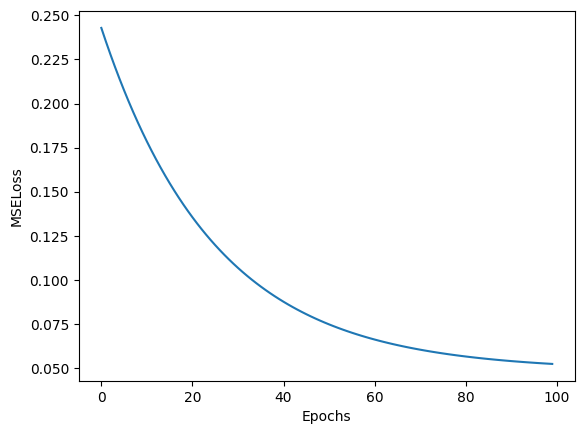

In [131]:
W = torch.zeros(X.shape[1],y.shape[1], dtype = torch.float, requires_grad = True) #This tensor will undergo the gradient
b = torch.tensor(0.0, requires_grad=True) #This scalar will undergo the gradient
matrix=torch.ones(y.shape[0],y.shape[1], dtype = torch.float, requires_grad = False) #This not


def linear_regression(x, w, b):
    return x@w+b*matrix #We can also not write explicitly the matrix here, everything is broadcasted by Pytorch automatically
def MSE(yhat,y):
  return ((yhat-y)**2).mean()

learning_rate = 0.01
epochs=100
losses = list()                                    # array of losses

for epoch in range(epochs):

  if W.grad is not None:
    W.grad.zero_()                          # gradient accumulates after each time .backward() is called, so we have to set it to 0 at each epoch
    b.grad.zero_() 
      
  yhat = linear_regression(X,W,b)
  loss = MSE(yhat, y)
  loss.backward()                                # !!!!!!!!!!!! we compute the derivative of the loss with respect to the parameters
  losses.append(float(loss))

  with torch.no_grad():                          # we don't want to accumulate the gradient in this step
    W -= learning_rate * W.grad 
    b -= learning_rate * b.grad 
    

print('Parameters:',W,'\nbias:',b,'\nloss:',losses[-1])

plt.plot(losses)

plt.xlabel("Epochs")
plt.ylabel("MSELoss")

plt.show()
plt.close()


To be more precise, when doing a univariate linear regression, we should use the following code. It is different in the number of dimensions of yhat,W and b:

Parameters: tensor([-1.3100e-11,  1.6787e-10,  3.6904e-11,  1.0303e-11, -3.5667e-11,
         3.0268e-12,  2.5524e-11,  2.7067e-12, -4.0221e-11,  8.4547e-12],
       requires_grad=True) 
bias: tensor([0.2781], requires_grad=True) 
loss: 0.07574958354234695


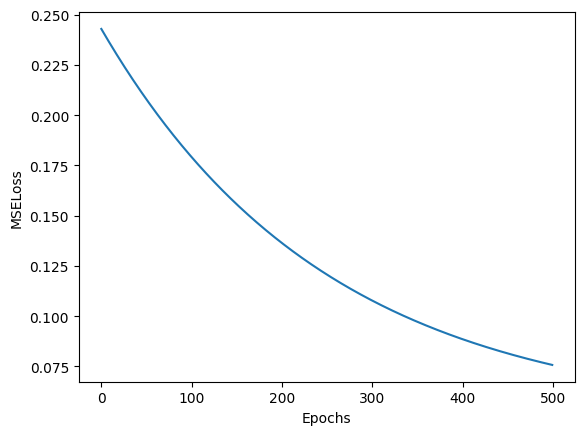

In [141]:
W = torch.zeros(X.shape[1], dtype = torch.float, requires_grad = True) #this is shape (10,)
b = torch.zeros(1, dtype = torch.float, requires_grad = True) #this is shape (1,)

def linear_regression(x, w, b):
    return x@w+b  #the result will be (442,)
def MSE(yhat,y):
  return ((yhat-y)*(yhat-y)).mean()

learning_rate = 0.001
epochs=500
losses = list()                                      # array of losses

for epoch in range(epochs):

  if W.grad is not None:
    W.grad.zero_()                          # gradient accumulates after each time .backward() is called, so we have to set it to 0 at each epoch
    b.grad.zero_() 
      
  yhat = linear_regression(X,W,b)
  loss = MSE(yhat, y)
  loss.backward()                                # !!!!!!!!!!!! we compute the derivative of the loss with respect to the parameters
  losses.append(float(loss))

  with torch.no_grad():                          # we don't want to accumulate the gradient in this step
    W -= learning_rate * W.grad 
    b -= learning_rate * b.grad 
    

print('Parameters:',W,'\nbias:',b,'\nloss:',losses[-1])

plt.plot(losses)

plt.xlabel("Epochs")
plt.ylabel("MSELoss")

plt.show()
plt.close()

### Gradient descent using Optimizer

The dataset:

In [219]:
X = torch.tensor(diabetes.data, dtype = torch.float) # m*D
y = torch.tensor(diabetes.target, dtype = torch.float).unsqueeze(1) #m*1
y = y / y.max()

print('In this database there are m =',X.shape[0],'data with D =',X.shape[1],'features. The target is', y.shape[1],'dimensional.')

In this database there are m = 442 data with D = 10 features. The target is 1 dimensional.


There is an automatically way to do the gradient, using the torch optimizer. This is non-batched, but the optimizer has the possibility of doing batch division. The result will be exactly equal to the previous case:

Parameters: tensor([-1.3100e-11,  1.6787e-10,  3.6904e-11,  1.0303e-11, -3.5667e-11,
         3.0268e-12,  2.5524e-11,  2.7067e-12, -4.0221e-11,  8.4547e-12],
       requires_grad=True) 
bias: tensor([0.2781], requires_grad=True) 
loss: 0.07574958354234695


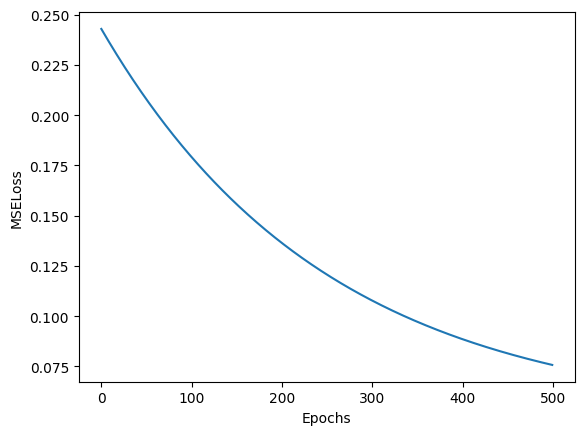

In [143]:
W = torch.zeros(X.shape[1], dtype = torch.float, requires_grad = True) #this is shape (10,)
b = torch.zeros(1, dtype = torch.float, requires_grad = True) #this is shape (1,)

def linear_regression(x, w, b):
    return x@w+b  #the result will be (442,)
def MSE(yhat,y):
  return ((yhat-y)*(yhat-y)).mean()

learning_rate = 0.001
epochs=500
losses = list() 

optimizer = torch.optim.SGD([W,b], lr=learning_rate)   # we initialize our optimizer,
                                                       # and we pass the parameters we want to optimize as a list of Torch tensors
                                                       # in this case sgd we will be full batched (so not very stochastic)
  
for epoch in range(epochs):
    y_hat = linear_regression(X,W,b)
    loss = MSE(y_hat, y)
    losses.append(float(loss))

    optimizer.zero_grad()   # setting gradients to zero
    loss.backward()         # computes the gradients
    optimizer.step()        # sgd step

print('Parameters:',W,'\nbias:',b,'\nloss:',losses[-1])

plt.plot(losses)

plt.xlabel("Epochs")
plt.ylabel("MSELoss")

plt.show()
plt.close()

# Fully-connected Neural Networks

## One hidden layer, single neuron in output (sigmoid)

The dataset:

In [726]:
X = torch.tensor(cancers.data, dtype = torch.float) # m*D
y = torch.tensor(cancers.target, dtype = torch.float).unsqueeze(1) #m*1

print('In this database there are m =',X.shape[0],'data with D =',X.shape[1],'features. The target is', y.shape[1],'dimensional.')

y[18:23] #the prediction is on two classes

In this database there are m = 569 data with D = 30 features. The target is 1 dimensional.


tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.]])

### Idea and logic

- We have X and y which are torch tensors of dimesion $(m,D)$ and $(m,1)$;
- Then we create data = CustomDataset(X,y) and:
    - train_set, test_set = random_split(data, [train_dimension, test_dimension], generator=torch.Generator().manual_seed(42)). We can access again the **original** X and y as:
        - **data.x---> X** and **data.y--->y**;
    We can access the X and y of train as:
        - **X_train=data.x[train_set.indices]** and **y_train=data.y[train_set.indices]**;
- Then:
    - train_loader = DataLoader(train_set, batch_size = BATCH_SIZE, shuffle=True);
    - test_loader = DataLoader(test_set, batch_size = len(test_set), shuffle=False);
- We can access the various objects by doing **for train_batch in train_loader:**. Suppose we are in the iteration number **i** and indicate the iterable variable as **train_batch_i**. Then:
    - **train_batch_i[0]** is the torch array of the X of the i-th batch. In general, the dimension of this object will be (Batch_size,D);
    - **train_batch_i[1]** is the torch array of the y of the i-th batch. In general, the dimension of this object will be (Batch_size,D);
- If needed we can do this: 

X_train_batch = list() 
y_train_batch = list()

for i, batch in enumerate(train_loader):

    X_train_batch.append(batch[0])  # X
    
    y_train_batch.append(batch[1])  # y



### Train-test split and normalization

Here there is the class we will use. Below there are instructions on how to use it:

In [727]:
class CustomDataset(Dataset):  #this class is inherited from the class Dataset which is taken from torch.utils.data import Dataset
  def __init__(self, x, y):
    #this functions initializes our dataset
    self.x = torch.tensor(x, dtype = torch.float32)
    self.y = torch.tensor(y, dtype = torch.float32)
    self.length = self.x.shape[0]       # number of samples
  def __getitem__(self, index):
    #given the index of an element, we return the element
    return self.x[index], self.y[index]
  def __len__(self):
    #this functions return the number of elements in our dataset
    return self.length

Properties of the class:

In [728]:
data = CustomDataset(X, y) #data.x and data.y are torch tensors, data is an object of the class CustomDataset
len(data) # 569, equal to X.shape[0]

test_dimension=int(0.2 * X.shape[0]) 
train_dimension=len(data) - test_dimension

#the train_set variable will contain both the X and the y of the training set! They are not torch tensors.
train_set, test_set = random_split(data, [train_dimension, test_dimension], generator=torch.Generator().manual_seed(42)) 

len(train_set)+len(test_set)==len(data) # True

train_set.indices #lists of the row indices of the training set
train_set.dataset == data #True

X_train=data.x[train_set.indices] #it is the X of the train_set
y_train=data.y[train_set.indices] #it is the y of the train_set
X_test=data.x[test_set.indices]
y_test=data.y[test_set.indices]

print(X_train.shape,X_test.shape)

torch.Size([456, 30]) torch.Size([113, 30])


Now we can do normalization. It is important to take the mean only on the training set:

In [729]:
means = data.x[train_set.indices].mean(axis = 0) #this is a vector with 30 entries (=number of features!), where the mean is computed along each column (axis=0)
stds = data.x[train_set.indices].std(axis = 0, correction = 0)
data.x = (data.x - means)/stds #this is an 'Hadamard' division!

#as a consequence we have that
data.x.mean(axis=0) #is little but non-zero, e-02
data.x[train_set.indices].mean(axis=0) #is zero, e-07

tensor([-1.2339e-07,  1.7463e-07, -2.5515e-07, -1.3176e-07,  3.1371e-08,
         1.3071e-07, -5.3853e-08, -3.6599e-08, -1.9032e-07,  6.1173e-08,
         1.1712e-07,  2.0914e-09, -5.9605e-08,  1.0457e-08, -1.4640e-08,
         7.7381e-08,  0.0000e+00,  2.0914e-07,  1.3803e-07, -2.1437e-08,
        -9.2021e-08,  7.3199e-08,  1.1189e-07, -2.7188e-08,  3.3462e-07,
         8.5747e-08, -4.7056e-08, -1.2653e-07, -5.4794e-07,  1.5999e-07])

### Batches

To divide in batches we have to use the class DataLoader. The advantage to use the DataLoader class is that it does not store in the memory all the batches! If the dataset is not divisible for the number of batches we will choose, one batch will contain less data. The objects in the DataLoader class are not torch tensors, but the iterable value (use a for!) in the DataLoader is a batch: from now on we will only use this class. 'Shuffle=True' shuffles the data at each epoch to improve the training. So the True must be present only for the training set.

In [730]:
BATCH_SIZE=128

train_loader = DataLoader(train_set, batch_size = BATCH_SIZE, shuffle=True) 
test_loader = DataLoader(test_set, batch_size = len(test_set), shuffle=False) #do not batch the test set!!!

for i,train_batch in enumerate(train_loader):
    print('The dimension of the',i,'- th batch is:',train_batch[0].shape,'for X of train and',train_batch[1].shape,'for y of train.','\n') #train_batch[0] is a torch tensor of the X of the train_Set

for i,test_batch in enumerate(test_loader):
    print('\n','The dimension of the',i,'- th batch is:',test_batch[0].shape,'for X of test and',test_batch[1].shape,'for y of test.','\n')

The dimension of the 0 - th batch is: torch.Size([128, 30]) for X of train and torch.Size([128, 1]) for y of train. 

The dimension of the 1 - th batch is: torch.Size([128, 30]) for X of train and torch.Size([128, 1]) for y of train. 

The dimension of the 2 - th batch is: torch.Size([128, 30]) for X of train and torch.Size([128, 1]) for y of train. 

The dimension of the 3 - th batch is: torch.Size([72, 30]) for X of train and torch.Size([72, 1]) for y of train. 


 The dimension of the 0 - th batch is: torch.Size([113, 30]) for X of test and torch.Size([113, 1]) for y of test. 



I can access directly to the torch tensor in the loader in the following way:

In [731]:
X_train_batch = []
y_train_batch = []

for i, batch in enumerate(train_loader):
    X_train_batch.append(batch[0])  # X
    y_train_batch.append(batch[1])  # y

X_train_batch[0].mean()


tensor(0.0869)

### Architecture

In the following model, the paramters are initializaed as $w=\text{unif}(-\sqrt k, \sqrt k)$, with $k=\frac{1}{N}$, and $N$ is the number of neurons at a specific layer. The requires_grad=True for the gradients is already contained in the architecture of nn.sequential, even if not writen explicitly.

In [732]:
input_dim = X.shape[1]
hidden_dim = 100
output_dim=y.shape[1] #in this case it is 1, because we have only one target variable

model = nn.Sequential(
              nn.Linear(input_dim, hidden_dim),
              nn.ReLU(),
              nn.Linear(hidden_dim, hidden_dim),
              nn.ReLU(),  
              nn.Linear(hidden_dim, output_dim),
              nn.Sigmoid()) #the output is a real number
 

We can access the 'model' in the following way. Moreover, the 'model' eats a torch tensor:

In [733]:
print(model,'\n') #scheme of the model
print(model[2].bias[0:6],'\n') #this accesses the values of the (at this stage initialized) weights at the layer 2

for param in model.parameters():
    print(param.shape)

model(X[:5] ).squeeze()

Sequential(
  (0): Linear(in_features=30, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=1, bias=True)
  (5): Sigmoid()
) 

tensor([-0.0278, -0.0406, -0.0841, -0.0772, -0.0869,  0.0859],
       grad_fn=<SliceBackward0>) 

torch.Size([100, 30])
torch.Size([100])
torch.Size([100, 100])
torch.Size([100])
torch.Size([1, 100])
torch.Size([1])


tensor([3.3795e-05, 4.5898e-03, 4.6454e-03, 4.5248e-02, 1.5945e-02],
       grad_fn=<SqueezeBackward0>)

Since the model must be initialized each time we want to train the algorhitm, it is better to define a class, which can be called wherever:

In [734]:
input_dim = X.shape[1]
hidden_dim = 100
output_dim=y.shape[1]

class my_net(nn.Sequential):
    
  def __init__(self, input_dim, hidden_dim, output_dim):
    super().__init__()              #It is needed to use the constructor of the parent class
    self.layer_1 = nn.Linear(input_dim, hidden_dim)
    self.activation_1 = nn.ReLU()                               
    self.layer_2 = nn.Linear(hidden_dim, hidden_dim)
    self.activation_2 = nn.ReLU()
    self.layer_3 = nn.Linear(hidden_dim, output_dim) 
    self.activation_3 = nn.Sigmoid()

  def forward(self, x):
    x = self.layer_1(x)                                            
    x = self.activation_1(x)                                       
    x = self.layer_2(x)                                              
    x = self.activation_2(x)   
    x = self.layer_3(x)                                            
    x = self.activation_3(x) 
    return x

model=my_net(input_dim, hidden_dim, output_dim)

### Metric of performance : accuracy

We are doing binary classification, for which we can use accuracy (or error rate) and F1-score:

In [737]:
def accuracy_of_model(model, train_loader, test_loader, threshold=0.5):
    correct_train, correct_test = 0., 0.
    
    with torch.no_grad():
        for x_train, y_train in train_loader:
            out_vector = model(x_train)  
            y_pred =  (out_vector >= threshold).float()
            correct_train += (y_pred.squeeze() == y_train.squeeze()).sum().item()
        
        for x_test, y_test in test_loader:
            out_vector = model(x_test)
            y_pred =  (out_vector >= threshold).float() 
            correct_test += (y_pred.squeeze() == y_test.squeeze()).sum().item() 
    
    acc_train = correct_train / len(train_loader.dataset) * 100
    acc_test = correct_test / len(test_loader.dataset) * 100
    return acc_train, acc_test

accuracy_of_model(model, train_loader, test_loader, threshold=0.5)

(70.39473684210526, 63.716814159292035)

### Training of the model

In [ ]:
train_losses = []
train_accuracies = []
test_accuracies = []

input_dim = X.shape[1]
hidden_dim = 100 #hyperparameter, we can change it
output_dim=y.shape[1]
EPOCHS = 100 #hyperparameter, we can change it
learning_rate = 0.05 #hyperparameter, we can change it

model = my_net(input_dim, hidden_dim, output_dim) #we create the model
loss_function = nn.BCELoss() # binary cross-entropy estimator, we will minimize this during the (stochastic) gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) #equal to the Linear Regression case with Optimizer, where model.parameters() was [W,b]

for epoch in range(EPOCHS):
  train_loss = 0
    
  for x_train, y_train in train_loader: #for each epoch, we do the backpropagation etc for each batch
    yhat = model(x_train) #the model returns a tensor of shape (batch_size,1), we squeeze it to have a tensor of shape (batch_size,)
    loss = loss_function(yhat.squeeze().float(), y_train.squeeze().float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss
      
  train_loss /= len(train_loader)   # we divide by the number of batches
  train_acc, test_acc = accuracy_of_model(model, train_loader, test_loader)
  train_losses.append(train_loss.detach())
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)
  
print(f"The best accuracy on the train set is {train_accuracies[-1]:.2f}%")
print(f"The best accuracy on the test set is {test_accuracies[-1]:.2f}%")
print('The lowest loss on the train set is',train_losses[-1].item())

The best accuracy on the train set is 99.12%
The best accuracy on the test set is 96.46%
The lowest loss on the train set is 0.04215455427765846


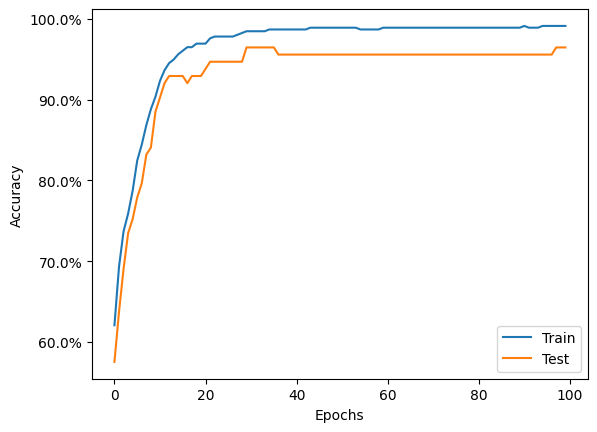

In [739]:
plt.plot(train_accuracies, label = "Train")
plt.plot(test_accuracies, label = "Test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
plt.show()
plt.close()

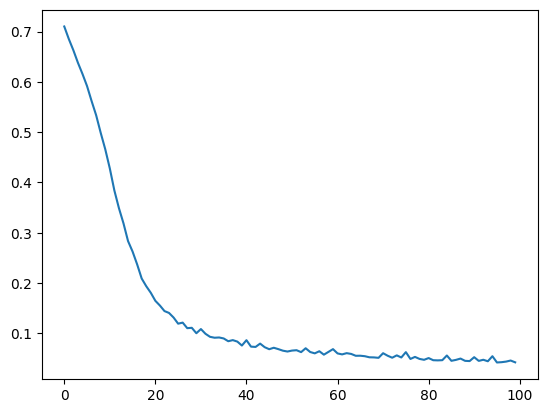

In [740]:
plt.plot(train_losses, label = "Train")
plt.show()
plt.close()

## MNIST: classes 1 and 7

### GPU vs CPU

In [174]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(device)
print(torch.backends.mps.is_available())  # True 
print(torch.backends.mps.is_built())      # True 

mps
True
True


### Load the Dataset, train-test split and normalization

When loading the MNIST dataset, we apply 'transformations'. However **train_dataset.data** and **train_dataset.targets** completely bypass the transformations; in particular, train_dataset.data gives raw tensors in uint8 format. To the TrainLoader class we will pass directly train_dataset, and so everything will be correctly normalized. Also, we change the label from 7 to 0, so to do binary classification later on.

In [164]:
transformations=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),  # Convert image to PyTorch tensor
                               torchvision.transforms.Normalize(   # Normalize pixel values, with mean 0.137 and std 0.3081 which are the
                                                                   # best numbers for MNIST (they do not know why)
                                 (0.1307,), (0.3081,))
                             ])


# Load MNIST training dataset and apply transformations
full_train_dataset = torchvision.datasets.MNIST('./mnist/', train=True, download=True,
                             transform=transformations)
full_train_dataset.targets[full_train_dataset.targets == 0] = 100
full_train_dataset.targets[full_train_dataset.targets == 7] = 0

# Load MNIST testing dataset and apply transformations
full_test_dataset = torchvision.datasets.MNIST('./mnist/', train=False, download=True,
                             transform=transformations)
full_test_dataset.targets[full_test_dataset.targets == 0] = 100
full_test_dataset.targets[full_test_dataset.targets == 7] = 0

#train_dataset.data #access the raw data, without normalization
#train_dataset.targets #access the targets, which are the labels of the data

#Accessing the data and the targets of the training set of the image number 8 (for example):
image_8=full_train_dataset[8][0] #it is [1,28,28]
label_8=torch.tensor(full_test_dataset[8][1],dtype=torch.int64).unsqueeze(0) #it is [1], the label of the image 8

print(
  'In this database there are m =', len(full_train_dataset),
  'images of train with D =', image_8.shape[1], 'x', image_8.shape[2], '=', image_8.shape[1] * image_8.shape[2],
  'features. The target is', label_8.shape[0], 'dimensional.'
)
print('The test set has m =',len(full_test_dataset),'data.')
print('The number of channel is',image_8.shape[0],'.')



In this database there are m = 60000 images of train with D = 28 x 28 = 784 features. The target is 1 dimensional.
The test set has m = 10000 data.
The number of channel is 1 .


We also take a subset of the original dataset. Using **Subset**, the result will not be a MNIST dataset anymore, but a torch.utils.data.Subset. As a consequence, we can not do anymore '.data' or '.targets'. Moreover, we want to restrict only to the classes with labels 1 or 7:

In [165]:
n_train = 3000
n_test = 500

# a torch vector of the form [13007], with the number of the indices of the images that are either 1 or 7
relevant_indices_train = ((full_train_dataset.targets == 1) | (full_train_dataset.targets == 0)).nonzero().squeeze() 
relevant_indices_test = ((full_test_dataset.targets == 1) | (full_test_dataset.targets == 0)).nonzero().squeeze()

print('There are', len(relevant_indices_train), 'images of 1 or 7 in the training set,'
      'and', len(relevant_indices_test), 'images of 1 or 7 in the test set.\n')


print('We restrict the training set to', n_train, 'images and the test set to', n_test, 'images.\n')
selected_train_indices = relevant_indices_train[:n_train]
selected_test_indices = relevant_indices_test[:n_test]

train_dataset = Subset(full_train_dataset, selected_train_indices)
test_dataset = Subset(full_test_dataset, selected_test_indices)

image_8=full_train_dataset[8][0]
label_8=torch.tensor(full_test_dataset[8][1],dtype=torch.int64).unsqueeze(0)

print(
  'In this database there are m =', len(train_dataset),
  'images of train with D =', image_8.shape[1], 'x', image_8.shape[2], '=', image_8.shape[1] * image_8.shape[2],
  'features. The target is', label_8.shape[0], 'dimensional.'
)
print('The test set has m =',len(test_dataset),'data.')
print('The number of channel is',image_8.shape[0],'.')

There are 13007 images of 1 or 7 in the training set,and 2163 images of 1 or 7 in the test set.

We restrict the training set to 3000 images and the test set to 500 images.

In this database there are m = 3000 images of train with D = 28 x 28 = 784 features. The target is 1 dimensional.
The test set has m = 500 data.
The number of channel is 1 .


Check that the labels are indeed 0,1:

In [166]:
for i,(image,label) in enumerate(train_dataset):
        
    if i < 6:
        print('The label of the image',i,'is',label)
    else:
        break

The label of the image 0 is 1
The label of the image 1 is 1
The label of the image 2 is 1
The label of the image 3 is 1
The label of the image 4 is 0
The label of the image 5 is 1


We draw the previous examples:

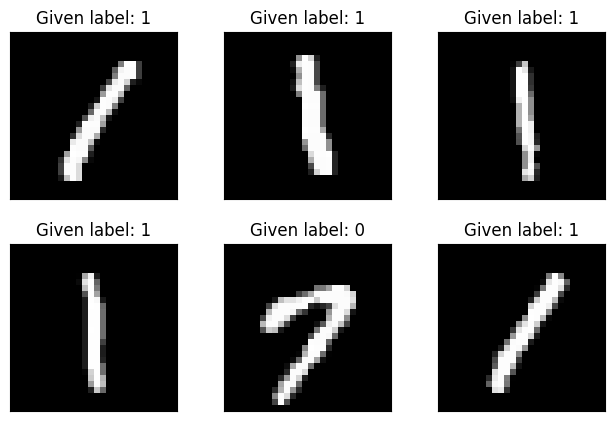

In [167]:
fig = plt.figure()

for i in range(6):
    image, label = train_dataset[i]  # train_dataset[i] restituisce (immagine trasformata, etichetta originale)
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(image.squeeze(), cmap='gray', interpolation='none')
    plt.title("Given label: {}".format(int(label)))
    plt.xticks([])
    plt.yticks([])

plt.show()

### Batches

It is important to print something in this section to see which is the form of the batches. For example, we see **train_dataset.data-->(xxx,28,28)** but in train_loader, **train_batch--> (xxx,1,28,28)**. As a consequence, in the flatten array in the architecture section we have to insert **nn.Flatten(1,3)**.

In [168]:
BATCH_SIZE=128

train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle=True) 
test_loader = DataLoader(test_dataset, batch_size = len(test_dataset), shuffle=False) #do not batch the test set!!!

for i,train_batch in enumerate(train_loader):
    if i==0:
        print('The dimension of the',i,'- th batch is:',train_batch[0].shape,'for X of train and',train_batch[1].shape,'for y of train.','\n') #train_batch[0] is a torch tensor of the X of the train_Set
    if i==len(train_loader)-1:
        print('The dimension of the',i,'- th batch is:',train_batch[0].shape,'for X of train and',train_batch[1].shape,'for y of train.','\n')

for i,test_batch in enumerate(test_loader):
    print('The dimension of the',i,'- th batch is:',test_batch[0].shape,'for X of test and',test_batch[1].shape,'for y of test.','\n')

The dimension of the 0 - th batch is: torch.Size([128, 1, 28, 28]) for X of train and torch.Size([128]) for y of train. 

The dimension of the 23 - th batch is: torch.Size([56, 1, 28, 28]) for X of train and torch.Size([56]) for y of train. 

The dimension of the 0 - th batch is: torch.Size([500, 1, 28, 28]) for X of test and torch.Size([500]) for y of test. 



### Architecture

The input data for an image are in the format **v=[number of images, number of channels ,28 ,28 ]**. The flatten function Flatten(1,3) does the following: it takes the vector v, it flattens the entries 1 to 3.

In [169]:
input_dim = image_8.shape[1] * image_8.shape[2] #784, the number of features of each image
hidden_dim = 10
output_dim=label_8.shape[0] #in this case it is 1, because we have only one target variable

class my_net(nn.Sequential):
    
  def __init__(self, input_dim, hidden_dim, output_dim):
    super().__init__()              #It is needed to use the constructor of the parent class
    self.flatten = nn.Flatten(1,3) #this layer will flatten the input tensor, so it will be of shape (batch_size, 784)
    self.layer_1 = nn.Linear(input_dim, hidden_dim)
    self.activation_1 = nn.ReLU()                               
    self.layer_2 = nn.Linear(hidden_dim, output_dim) 
    self.activation_2 = nn.Sigmoid()

  def forward(self, x):
    x = self.flatten(x)  
    x = self.layer_1(x)                                            
    x = self.activation_1(x)                                          
    x = self.layer_2(x)                                            
    x = self.activation_2(x) 
    return x

model=my_net(input_dim, hidden_dim, output_dim).to(device) 


### Metric of performance : accuracy

We are doing binary classification, for which we can use accuracy (or error rate) and F1-score:

In [170]:
def accuracy_of_model(model, train_loader, test_loader, threshold=0.5):
    correct_train, correct_test = 0., 0.
    
    with torch.no_grad():
        for x_train, y_train in train_loader:
            x_train = x_train.to(device)  # Move input to the device
            y_train = y_train.to(device)  # Move target to the device
            model.to(device)  # Ensure the model is on the correct device
            out_vector = model(x_train)  
            y_pred =  (out_vector >= threshold).float()
            correct_train += (y_pred.squeeze() == y_train.squeeze()).sum().item()
        
        for x_test, y_test in test_loader:
            x_test = x_test.to(device)  # Move input to the device
            y_test = y_test.to(device)  # Move target to the device
            model.to(device)  # Ensure the model is on the correct device
            out_vector = model(x_test)
            y_pred =  (out_vector >= threshold).float() 
            correct_test += (y_pred.squeeze() == y_test.squeeze()).sum().item() 
    
    acc_train = correct_train / len(train_loader.dataset) * 100
    acc_test = correct_test / len(test_loader.dataset) * 100
    return acc_train, acc_test

accuracy_of_model(model, train_loader, test_loader, threshold=0.5)

(54.800000000000004, 55.2)

### Training

In [ ]:
train_losses = []
train_accuracies = []
test_accuracies = []

input_dim = image_8.shape[1] * image_8.shape[2] #784, the number of features of each image
hidden_dim = 10
output_dim=label_8.shape[0] #in this case it is 1, because we have only one target variable
EPOCHS = 100 #hyperparameter, we can change it
learning_rate = 0.01 #hyperparameter, we can change it

model = my_net(input_dim, hidden_dim, output_dim).to(device) #we create the model
loss_function = nn.BCELoss() # binary cross-entropy estimator, we will minimize this during the (stochastic) gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) #equal to the Linear Regression case with Optimizer, where model.parameters() was [W,b]

for epoch in range(EPOCHS):
  train_loss = 0
    
  for x_train, y_train in train_loader: #for each epoch, we do the backpropagation etc for each batch
    x_train = x_train.to(device)  # Move input to the device
    y_train = y_train.to(device)  # Move target to the device
    yhat = model(x_train) #the model returns a tensor of shape (batch_size,1), we squeeze it to have a tensor of shape (batch_size,)
    loss = loss_function(yhat.squeeze().float(), y_train.squeeze().float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss
      
  train_loss /= len(train_loader)   # we divide by the number of batches
  train_acc, test_acc = accuracy_of_model(model, train_loader, test_loader)
  train_losses.append(train_loss.detach().cpu())  # detach and move to CPU for plotting
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)
  
print(f"The best accuracy on the train set is {train_accuracies[-1]:.2f}%")
print(f"The best accuracy on the test set is {test_accuracies[-1]:.2f}%")
print('The lowest loss on the train set is',train_losses[-1].item())

The best accuracy on the train set is 99.87%
The best accuracy on the test set is 98.80%
The lowest loss on the train set is 0.008051164448261261


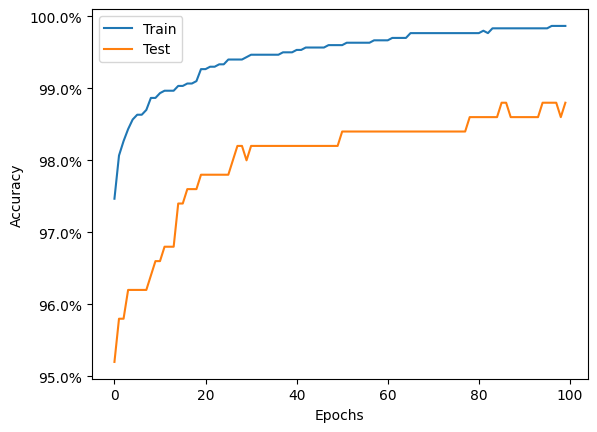

In [172]:
plt.plot(train_accuracies, label = "Train")
plt.plot(test_accuracies, label = "Test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
plt.show()
plt.close()

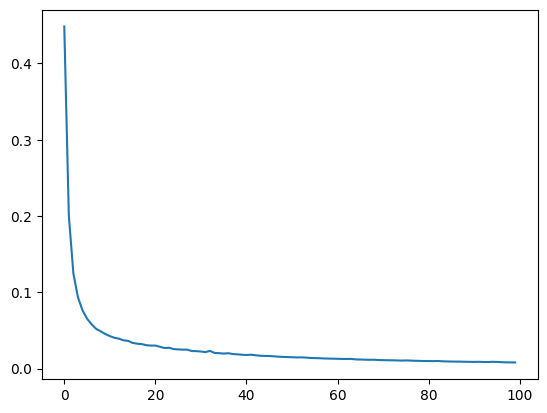

In [173]:
plt.plot(train_losses, label = "Train")
plt.show()
plt.close()

## MNIST: all classes

### GPU vs CPU

In [47]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(device)
print(torch.backends.mps.is_available())  # True 
print(torch.backends.mps.is_built())      # True 

mps
True
True


### Load the Dataset, train-test split and normalization

In [58]:
transformations=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),  # Convert image to PyTorch tensor
                               torchvision.transforms.Normalize(   # Normalize pixel values, with mean 0.137 and std 0.3081 which are the
                                                                   # best numbers for MNIST (they do not know why)
                                 (0.1307,), (0.3081,))
                             ])


# Load MNIST training dataset and apply transformations
full_train_dataset = torchvision.datasets.MNIST('./mnist/', train=True, download=True,
                             transform=transformations)

# Load MNIST testing dataset and apply transformations
full_test_dataset = torchvision.datasets.MNIST('./mnist/', train=False, download=True,
                             transform=transformations)

#train_dataset.data #access the raw data, without normalization
#train_dataset.targets #access the targets, which are the labels of the data

#Accessing the data and the targets of the training set of the image number 8 (for example):
image_8=full_train_dataset[8][0] #it is [1,28,28]
label_8=torch.tensor(full_test_dataset[8][1],dtype=torch.int64).unsqueeze(0) #it is [1], the label of the image 8

print(
  'In this database there are m =', len(full_train_dataset),
  'images of train with D =', image_8.shape[1], 'x', image_8.shape[2], '=', image_8.shape[1] * image_8.shape[2],
  'features. The target is', label_8.shape[0], 'dimensional.'
)
print('The test set has m =',len(full_test_dataset),'data.')
print('The number of channel is',image_8.shape[0],'.')



In this database there are m = 60000 images of train with D = 28 x 28 = 784 features. The target is 1 dimensional.
The test set has m = 10000 data.
The number of channel is 1 .


We also take a subset of the original dataset. Using **Subset**, the result will not be a MNIST dataset anymore, but a torch.utils.data.Subset. As a consequence, we can not do anymore '.data' or '.targets'.

In [59]:
n_train = 6000
n_test = 1000

print('We restrict the training set to', n_train, 'images and the test set to', n_test, 'images.\n')
selected_train_indices = list(range(n_train))
selected_test_indices = list(range(n_test))

train_dataset = Subset(full_train_dataset, selected_train_indices)
test_dataset = Subset(full_test_dataset, selected_test_indices)

image_8=full_train_dataset[8][0]
label_8=torch.tensor(full_test_dataset[8][1],dtype=torch.int64).unsqueeze(0)

print(
  'In this database there are m =', len(train_dataset),
  'images of train with D =', image_8.shape[1], 'x', image_8.shape[2], '=', image_8.shape[1] * image_8.shape[2],
  'features. The target is', label_8.shape[0], 'dimensional.'
)
print('The test set has m =',len(test_dataset),'data.')
print('The number of channel is',image_8.shape[0],'.')

We restrict the training set to 6000 images and the test set to 1000 images.

In this database there are m = 6000 images of train with D = 28 x 28 = 784 features. The target is 1 dimensional.
The test set has m = 1000 data.
The number of channel is 1 .


We draw some of the previous examples:

The label of the image 0 is 5
The label of the image 1 is 0
The label of the image 2 is 4
The label of the image 3 is 1
The label of the image 4 is 9
The label of the image 5 is 2


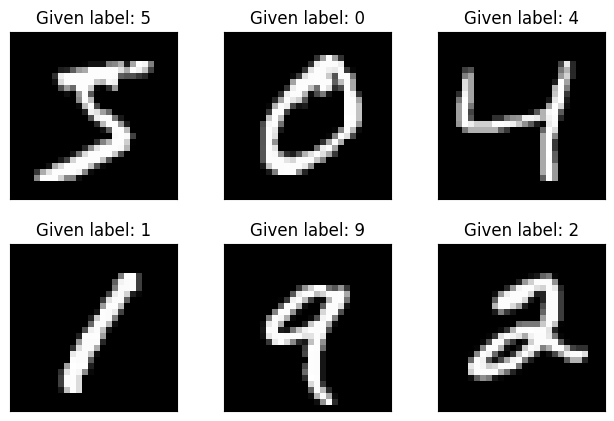

In [5]:
for i,(image,label) in enumerate(train_dataset):
        
    if i < 6:
        print('The label of the image',i,'is',label)
    else:
        break

fig = plt.figure()

for i in range(6):
    image, label = train_dataset[i]  # train_dataset[i] restituisce (immagine trasformata, etichetta originale)
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(image.squeeze(), cmap='gray', interpolation='none')
    plt.title("Given label: {}".format(int(label)))
    plt.xticks([])
    plt.yticks([])

plt.show()

### Batches

It is important to print something in this section to see which is the form of the batches. For example, we see **train_dataset.data-->(xxx,28,28)** but in train_loader, **train_batch--> (xxx,1,28,28)**. As a consequence, in the flatten array in the architecture section we have to insert **nn.Flatten(1,3)**.

In [62]:
BATCH_SIZE=128

train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle=True) 
test_loader = DataLoader(test_dataset, batch_size = len(test_dataset), shuffle=False) #do not batch the test set!!!

for i,train_batch in enumerate(train_loader):
    if i==0:
        print('The dimension of the',i,'- th batch is:',train_batch[0].shape,'for X of train and',train_batch[1].shape,'for y of train.','\n') #train_batch[0] is a torch tensor of the X of the train_Set
    if i==len(train_loader)-1:
        print('The dimension of the',i,'- th batch is:',train_batch[0].shape,'for X of train and',train_batch[1].shape,'for y of train.','\n')

for i,test_batch in enumerate(test_loader):
    print('The dimension of the',i,'- th batch is:',test_batch[0].shape,'for X of test and',test_batch[1].shape,'for y of test.','\n')

The dimension of the 0 - th batch is: torch.Size([128, 1, 28, 28]) for X of train and torch.Size([128]) for y of train. 

The dimension of the 46 - th batch is: torch.Size([112, 1, 28, 28]) for X of train and torch.Size([112]) for y of train. 

The dimension of the 0 - th batch is: torch.Size([1000, 1, 28, 28]) for X of test and torch.Size([1000]) for y of test. 



### Architecture

The input data for an image are in the format **v=[number of images, number of channels ,28 ,28 ]**. The flatten function Flatten(1,3) does the following: it takes the vector v, it flattens the entries 1 to 3.

In [65]:
input_dim = image_8.shape[1] * image_8.shape[2] #784, the number of features of each image
hidden_dim = 100
output_dim=10 #the number of classes, which is 10 in this case (0,1,2,3,4,5,6,7,8,9)

class my_net(nn.Sequential):
    
  def __init__(self, input_dim, hidden_dim, output_dim):
    super().__init__()              #It is needed to use the constructor of the parent class
    self.flatten = nn.Flatten(1,3) #this layer will flatten the input tensor, so it will be of shape (batch_size, 784)
    self.layer_1 = nn.Linear(input_dim, hidden_dim)
    self.activation_1 = nn.ReLU()                               
    self.layer_2 = nn.Linear(hidden_dim, output_dim) 
    #self.activation_2 = nn.Softmax(dim=1) #Do not use it, because we will use CrossEntropyLoss, which already applies the softmax function internally.

  def forward(self, x):
    x = self.flatten(x)  
    x = self.layer_1(x)                                            
    x = self.activation_1(x)                                          
    x = self.layer_2(x)                                            
    #x = self.activation_2(x) 
    return x

model=my_net(input_dim, hidden_dim, output_dim).to(device) 


### Metric of performance : accuracy

We have to define the accuracy on more classes this time! Let's see how:

In [66]:
def accuracy_of_model(model, train_loader, test_loader):
    correct_train, correct_test = 0., 0.
    
    with torch.no_grad():
        for x_train, y_train in train_loader:
            x_train = x_train.to(device)  # Move input to the device
            y_train = y_train.to(device)  # Move target to the device
            model.to(device)  # Ensure the model is on the correct device
            out_vector = torch.softmax(model(x_train), dim=1) #this is the index which corresponds to the maximum value in the output vector, and it is already the assigned class
            y_pred = torch.argmax(out_vector, dim=1) 
            correct_train += (y_pred.squeeze() == y_train.squeeze()).sum().item()
        
        for x_test, y_test in test_loader:
            x_test = x_test.to(device)  # Move input to the device
            y_test = y_test.to(device)  # Move target to the device
            model.to(device)  # Ensure the model is on the correct device
            out_vector = torch.softmax(model(x_test), dim=1)  #this is the index which corresponds to the maximum value in the output vector, and it is already the assigned class
            y_pred = torch.argmax(out_vector, dim=1)
            correct_test += (y_pred.squeeze() == y_test.squeeze()).sum().item() 
    
    acc_train = correct_train / len(train_loader.dataset) * 100
    acc_test = correct_test / len(test_loader.dataset) * 100
    return acc_train, acc_test

accuracy_of_model(model, train_loader, test_loader)

(13.683333333333334, 13.600000000000001)

### Training

In [94]:
train_losses = []
train_accuracies = []
test_accuracies = []

input_dim = image_8.shape[1] * image_8.shape[2] #784, the number of features of each image
hidden_dim = 128
output_dim=10 #the number of classes, which is 10 in this case (0,1,2,3,4,5,6,7,8,9)
EPOCHS = 100 #hyperparameter, we can change it
learning_rate = 0.05 #hyperparameter, we can change it

model = my_net(input_dim, hidden_dim, output_dim).to(device) #we create the model
loss_function = nn.CrossEntropyLoss() # non-binary cross-entropy estimator, it does internally the softmax function, so we do not need to apply it in the model
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) #equal to the Linear Regression case with Optimizer, where model.parameters() was [W,b]

for epoch in range(EPOCHS):
  train_loss = 0
    
  for x_train, y_train in train_loader: #for each epoch, we do the backpropagation etc for each batch
    x_train = x_train.to(device)  # Move input to the device
    y_train = y_train.to(device)  # Move target to the device
    yhat = model(x_train) #the model returns a tensor of shape (batch_size,1), we squeeze it to have a tensor of shape (batch_size,)
    loss = loss_function(yhat, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss
      
  train_loss /= len(train_loader)   # we divide by the number of batches
  train_acc, test_acc = accuracy_of_model(model, train_loader, test_loader)
  train_losses.append(train_loss.detach().cpu())
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)
  
print(f"The best accuracy on the train set is {train_accuracies[-1]:.2f}%")
print(f"The best accuracy on the test set is {test_accuracies[-1]:.2f}%")
print('The lowest loss on the train set is',train_losses[-1].item())

The best accuracy on the train set is 100.00%
The best accuracy on the test set is 92.70%
The lowest loss on the train set is 0.008030307479202747


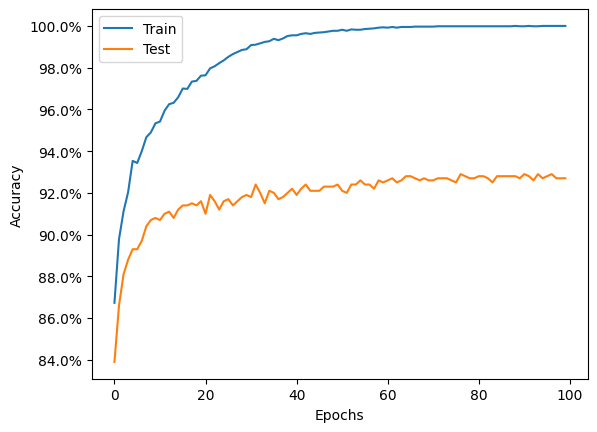

In [95]:
plt.plot(train_accuracies, label = "Train")
plt.plot(test_accuracies, label = "Test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
plt.show()
plt.close()

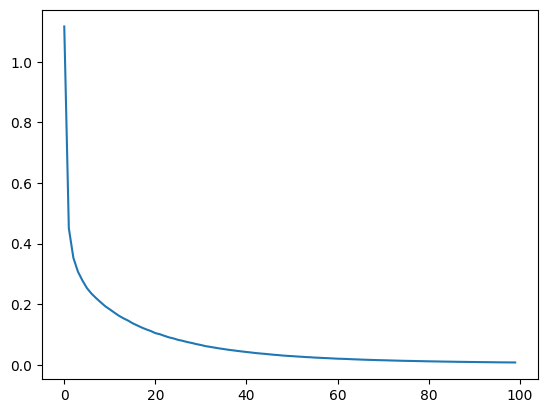

In [96]:
plt.plot(train_losses, label = "Train")
plt.show()
plt.close()

# Convolutional Neural Networks

## MNIST

### GPU vs CPU

In [15]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(device)
print(torch.backends.mps.is_available())  # True 
print(torch.backends.mps.is_built())      # True 

mps
True
True


### Load the Dataset, train-test split and normalization

As before we load the dataset and apply transformations. If we want, we can also use data augmentation **only on the train set**, to improve generalization and robustness. The idea is that if the train is done on a more complicated dataset, then the results will be better on the test set.

In [ ]:
# Load MNIST training dataset and apply transformations
train_transformations = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(28), #Randomly crops and resizes the input image to a specified size.
    torchvision.transforms.RandomHorizontalFlip(), #Randomly flips the input image horizontally with a given probability.
    torchvision.transforms.RandomRotation(10), #Randomly rotates the input image by a specified angle.
    torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), #Randomly adjusts brightness, 
                                               #contrast, saturation, and hue of the input image.
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize( (0.1307,), (0.3081,))
])
train_transformations=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])
full_train_dataset = torchvision.datasets.MNIST('./mnist/', train=True, download=True,
                             transform=train_transformations)

# Load MNIST testing dataset and apply transformations
test_transformations=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),  # Convert image to PyTorch tensor
                               torchvision.transforms.Normalize(   # Normalize pixel values, with mean 0.137 and std 0.3081 which are the
                                                                   # best numbers for MNIST (they do not know why)
                                 (0.1307,), (0.3081,))
                             ])
full_test_dataset = torchvision.datasets.MNIST('./mnist/', train=False, download=True,
                             transform=test_transformations)


#Accessing the data and the targets of the training set of the image number 8 (for example):
image_8=full_train_dataset[8][0] #it is [1,28,28]
label_8=torch.tensor(full_test_dataset[8][1],dtype=torch.int64).unsqueeze(0) #it is [1], the label of the image 8

print(
  'In this database there are m =', len(full_train_dataset),
  'images of train with D =', image_8.shape[1], 'x', image_8.shape[2], '=', image_8.shape[1] * image_8.shape[2],
  'features. The target is', label_8.shape[0], 'dimensional.'
)
print('The test set has m =',len(full_test_dataset),'data.')
print('The number of channel is',image_8.shape[0],'.\n')


n_train = 2000
n_test = 500

print('We restrict the training set to', n_train, 'images and the test set to', n_test, 'images.\n')
selected_train_indices = list(range(n_train))
selected_test_indices = list(range(n_test))

train_dataset = Subset(full_train_dataset, selected_train_indices)
test_dataset = Subset(full_test_dataset, selected_test_indices)

image_8=full_train_dataset[8][0]
label_8=torch.tensor(full_test_dataset[8][1],dtype=torch.int64).unsqueeze(0)

print(
  'In this database there are m =', len(train_dataset),
  'images of train with D =', image_8.shape[1], 'x', image_8.shape[2], '=', image_8.shape[1] * image_8.shape[2],
  'features. The target is', label_8.shape[0], 'dimensional.'
)
print('The test set has m =',len(test_dataset),'data.')
print('The number of channel is',image_8.shape[0],'.')

In this database there are m = 60000 images of train with D = 28 x 28 = 784 features. The target is 1 dimensional.
The test set has m = 10000 data.
The number of channel is 1 .

We restrict the training set to 2000 images and the test set to 500 images.

In this database there are m = 2000 images of train with D = 28 x 28 = 784 features. The target is 1 dimensional.
The test set has m = 500 data.
The number of channel is 1 .


The label of the image 0 is 5
The label of the image 1 is 0
The label of the image 2 is 4
The label of the image 3 is 1
The label of the image 4 is 9
The label of the image 5 is 2


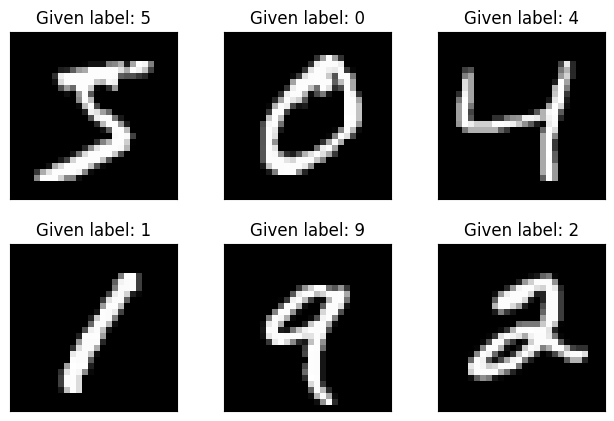

In [17]:
for i,(image,label) in enumerate(train_dataset):
        
    if i < 6:
        print('The label of the image',i,'is',label)
    else:
        break

fig = plt.figure()

for i in range(6):
    image, label = train_dataset[i]  # train_dataset[i] restituisce (immagine trasformata, etichetta originale)
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(image.squeeze(), cmap='gray', interpolation='none')
    plt.title("Given label: {}".format(int(label)))
    plt.xticks([])
    plt.yticks([])

plt.show()

### Batches

It is important to print something in this section to see which is the form of the batches. For example, we see **train_dataset.data-->(xxx,28,28)** but in train_loader, **train_batch--> (xxx,1,28,28)**. As a consequence, in the flatten array in the architecture section we have to insert **nn.Flatten(1,3)**.

In [18]:
BATCH_SIZE=128

train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle=True, drop_last = True) #drop_last=True: ignores the last batch if it is smaller than other batches
test_loader = DataLoader(test_dataset, batch_size = len(test_dataset), shuffle=False) #do not batch the test set!!!

for i,train_batch in enumerate(train_loader):
    if i==0:
        print('The dimension of the',i,'- th batch is:',train_batch[0].shape,'for X of train and',train_batch[1].shape,'for y of train.','\n') #train_batch[0] is a torch tensor of the X of the train_Set
    if i==len(train_loader)-1:
        print('The dimension of the',i,'- th batch is:',train_batch[0].shape,'for X of train and',train_batch[1].shape,'for y of train.','\n')

for i,test_batch in enumerate(test_loader):
    print('The dimension of the',i,'- th batch is:',test_batch[0].shape,'for X of test and',test_batch[1].shape,'for y of test.','\n')

The dimension of the 0 - th batch is: torch.Size([128, 1, 28, 28]) for X of train and torch.Size([128]) for y of train. 

The dimension of the 14 - th batch is: torch.Size([128, 1, 28, 28]) for X of train and torch.Size([128]) for y of train. 

The dimension of the 0 - th batch is: torch.Size([500, 1, 28, 28]) for X of test and torch.Size([500]) for y of test. 



### Architecture

We will build a convolutional part and then a fully connected part, where it is needed a Flatten(1,3) first of all.

In [19]:
input_dim = image_8.shape[1] * image_8.shape[2] #784, the number of features of each image, which is not used here because we use filters!
hidden_dim = 100
output_dim=10 #the number of classes, which is 10 in this case (0,1,2,3,4,5,6,7,8,9)
number_of_input_channels = image_8.shape[0] #1, because we have only one channel (the gray scale)
number_of_filters = 32 #number of filters in the convolutional layer, it is a hyperparameter that we can change
kernel_size = 7 #size of the filter, it is a hyperparameter that we can change
stride=1 #stride of the convolutional layer, it is a hyperparameter that we can change
padding=0 #padding of the convolutional layer, it is a hyperparameter that we can change

class my_net(nn.Module):
    
  def __init__(self, input_dim, hidden_dim, output_dim):
    super().__init__()              #It is needed to use the constructor of the parent class

    #CONVOLUTIONAL PART

    self.conv = nn.Conv2d(number_of_input_channels,number_of_filters, kernel_size, stride=stride, padding=padding, 
                      dilation=1, groups=1, bias=True, padding_mode='zeros', 
                      device=None, dtype=None) #the conv layer is not interested in 28*28
    self.activation_0 = nn.ReLU() 

    #FULLY CONNECTED PART

    self.flatten = nn.Flatten(1,3) #this layer will flatten the input tensor, so it will be of shape (batch_size, 784)
    self.layer_1 = nn.Linear(int(((image_8.shape[1]+2*padding-kernel_size)/(stride)+1)**2)*number_of_filters, hidden_dim)
    self.activation_1 = nn.ReLU()                               
    self.layer_2 = nn.Linear(hidden_dim, output_dim) 
    #self.activation_2 = nn.Softmax(dim=1) #Do not use it, because we will use CrossEntropyLoss, which already applies the softmax function internally.

  def forward(self, x):

    #CONVOLUTIONAL PART

    x = self.conv(x) 
    x = self.activation_0(x)

    #FULLY CONNECTED PART

    x = self.flatten(x)  
    x = self.layer_1(x)                                            
    x = self.activation_1(x)                                          
    x = self.layer_2(x)                                            
    #x = self.activation_2(x) 
    return x

model=my_net(input_dim, hidden_dim, output_dim).to(device) 


#### More complicated layers

We introduce the basic layer for convolutional networks: `torch.nn.Conv2d`.
This layer performs 2D convolution on input tensors. It applies a 2D filter (kernel) to the input tensor and computes the element-wise multiplication followed by summation to produce the output feature map.

Parameters of interest include:

* **in_channels**: Number of input channels.
* **out_channels**: Number of output channels (i.e., number of filters).
* **kernel_size**: Size of the convolutional kernel.
* **stride**: Stride of the convolution.
* **padding**: Padding added to input feature map.




* **2D max pooling/average pooling**

`torch.nn.MaxPool2d` and `torch.nn.AvgPool2d` downsample the input feature maps by taking either the maximum or average value within a specified window (kernel size) and stride.

*Parameters*: kernel_size, stride, padding, ceil_mode (for MaxPool2d).



* **Batch normalization**

`torch.nn.BatchNorm2d` normalizes the activations of each channel across a mini-batch. It helps in stabilizing and accelerating the training of deep neural networks by reducing internal covariate shift.

*Parameters*: num_features (number of input channels).



* **Dropout**

`torch.nn.Dropout` layer randomly sets a fraction of input units to zero during training, which helps in reducing overfitting by preventing complex co-adaptations of neurons.

*Parameter*: p (probability of dropping a neuron).

**IMPORTANT**: In PyTorch, `model.train()` is a method used to set the model in training mode. This method is typically called on a PyTorch model object before starting the training loop. This mode is important because **certain layers like dropout and batch normalization behave differently during training** compared to evaluation (testing) mode. To switch them you have to call `model.train()` and `model.eval()` before the respective steps.

In [71]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc1(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

model = CNN().to(device)

### Metric of performance : accuracy

Same as for the MNIST classification with fully connected neural nets, but there is the presence of model.eval():

In [25]:
def accuracy_of_model(model, train_loader, test_loader):
    correct_train, correct_test = 0., 0.
    model.eval()
    with torch.no_grad():
        for x_train, y_train in train_loader:
            x_train = x_train.to(device)  # Move input to the device
            y_train = y_train.to(device)  # Move target to the device
            model.to(device)  # Ensure the model is on the correct device
            out_vector = torch.softmax(model(x_train), dim=1) #this is the index which corresponds to the maximum value in the output vector, and it is already the assigned class
            y_pred = torch.argmax(out_vector, dim=1) 
            correct_train += (y_pred.squeeze() == y_train.squeeze()).sum().item()
        
        for x_test, y_test in test_loader:
            x_test = x_test.to(device)  # Move input to the device
            y_test = y_test.to(device)  # Move target to the device
            model.to(device)  # Ensure the model is on the correct device
            out_vector = torch.softmax(model(x_test), dim=1)  #this is the index which corresponds to the maximum value in the output vector, and it is already the assigned class
            y_pred = torch.argmax(out_vector, dim=1)
            correct_test += (y_pred.squeeze() == y_test.squeeze()).sum().item() 
    
    acc_train = correct_train / len(train_loader.dataset) * 100
    acc_test = correct_test / len(test_loader.dataset) * 100
    return acc_train, acc_test

accuracy_of_model(model, train_loader, test_loader)

(96.0, 93.0)

### Training

In [24]:
train_losses = []
train_accuracies = []
test_accuracies = []

input_dim = image_8.shape[1] * image_8.shape[2] #784, the number of features of each image, which is not used here because we use filters!
hidden_dim = 100
output_dim=10 #the number of classes, which is 10 in this case (0,1,2,3,4,5,6,7,8,9)
number_of_input_channels = image_8.shape[0] #1, because we have only one channel (the gray scale)
number_of_filters = 32 #number of filters in the convolutional layer, it is a hyperparameter that we can change
kernel_size = 7 #size of the filter, it is a hyperparameter that we can change
stride=1 #stride of the convolutional layer, it is a hyperparameter that we can change
padding=0 #padding of the convolutional layer, it is a hyperparameter that we can change
EPOCHS = 100 #hyperparameter, we can change it
learning_rate = 0.01 #hyperparameter, we can change it

model = my_net(input_dim, hidden_dim, output_dim).to(device) #we create the model
loss_function = nn.CrossEntropyLoss() # non-binary cross-entropy estimator, it does internally the softmax function, so we do not need to apply it in the model
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate) #equal to the Linear Regression case with Optimizer, where model.parameters() was [W,b]

for epoch in range(EPOCHS):
  model.train() # Set the model to training mode
  train_loss = 0
    
  for x_train, y_train in train_loader: #for each epoch, we do the backpropagation etc for each batch
    x_train = x_train.to(device)  # Move input to the device
    y_train = y_train.to(device)  # Move target to the device
    yhat = model(x_train) #the model returns a tensor of shape (batch_size,1), we squeeze it to have a tensor of shape (batch_size,)
    loss = loss_function(yhat, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss
      
  train_loss /= len(train_loader)   # we divide by the number of batches
  train_acc, test_acc = accuracy_of_model(model, train_loader, test_loader)
  train_losses.append(train_loss.detach().cpu())
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)
  
print(f"The best accuracy on the train set is {train_accuracies[-1]:.2f}%")
print(f"The best accuracy on the test set is {test_accuracies[-1]:.2f}%")
print('The lowest loss on the train set is',train_losses[-1].item())

The best accuracy on the train set is 96.00%
The best accuracy on the test set is 93.00%
The lowest loss on the train set is 2.1827589080203325e-05


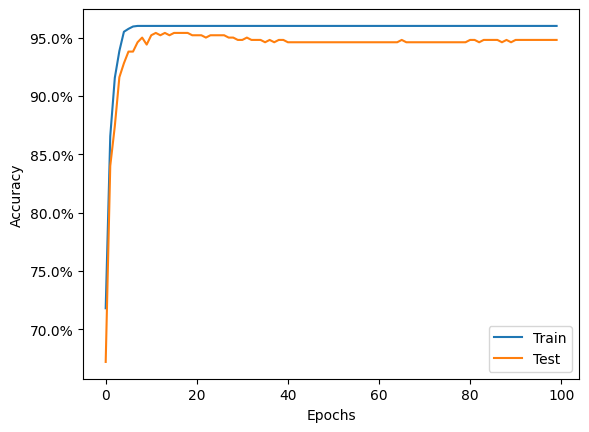

In [22]:
plt.plot(train_accuracies, label = "Train")
plt.plot(test_accuracies, label = "Test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
plt.show()
plt.close()

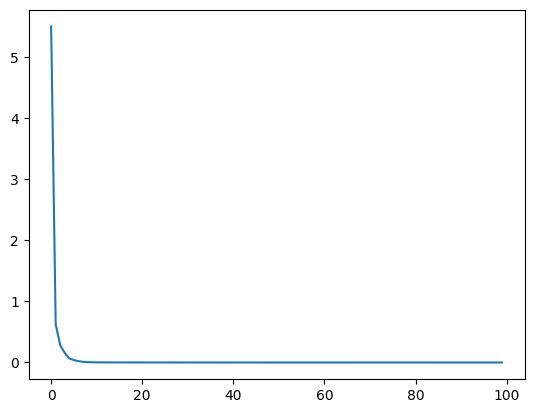

In [23]:
plt.plot(train_losses, label = "Train")
plt.show()
plt.close()

# Autoencoders

## (denoising) MNIST

### GPU, load the dataset, train-test split, batches

In [57]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(device)
print(torch.backends.mps.is_available())  # True 
print(torch.backends.mps.is_built())      # True 

mps
True
True


We do not use the standard normalization for MNIST, beacuse the autoencoder will learn how to represent the original data:

In [58]:
transformations=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()
                             ])

full_train_dataset = torchvision.datasets.MNIST('./mnist/', train=True, download=True,
                             transform=transformations)
full_test_dataset = torchvision.datasets.MNIST('./mnist/', train=False, download=True,
                             transform=transformations)


#Accessing the data and the targets of the training set of the image number 8 (for example):
image_8=full_train_dataset[8][0] #it is [1,28,28]
label_8=torch.tensor(full_test_dataset[8][1],dtype=torch.int64).unsqueeze(0) #it is [1], the label of the image 8

print(
  'In this database there are m =', len(full_train_dataset),
  'images of train with D =', image_8.shape[1], 'x', image_8.shape[2], '=', image_8.shape[1] * image_8.shape[2],
  'features. The target is', label_8.shape[0], 'dimensional.'
)
print('The test set has m =',len(full_test_dataset),'data.')
print('The number of channel is',image_8.shape[0],'.\n')


n_train = len(full_train_dataset) #2000
n_test = len(full_test_dataset) #500

print('We restrict the training set to', n_train, 'images and the test set to', n_test, 'images.\n')
selected_train_indices = list(range(n_train))
selected_test_indices = list(range(n_test))

train_dataset = Subset(full_train_dataset, selected_train_indices)
test_dataset = Subset(full_test_dataset, selected_test_indices)

image_8=full_train_dataset[8][0]
label_8=torch.tensor(full_test_dataset[8][1],dtype=torch.int64).unsqueeze(0)

print(
  'In this database there are m =', len(train_dataset),
  'images of train with D =', image_8.shape[1], 'x', image_8.shape[2], '=', image_8.shape[1] * image_8.shape[2],
  'features. The target is', label_8.shape[0], 'dimensional.'
)
print('The test set has m =',len(test_dataset),'data.')
print('The number of channel is',image_8.shape[0],'.')

In this database there are m = 60000 images of train with D = 28 x 28 = 784 features. The target is 1 dimensional.
The test set has m = 10000 data.
The number of channel is 1 .

We restrict the training set to 60000 images and the test set to 10000 images.

In this database there are m = 60000 images of train with D = 28 x 28 = 784 features. The target is 1 dimensional.
The test set has m = 10000 data.
The number of channel is 1 .


The label of the image 0 is 5
The label of the image 1 is 0
The label of the image 2 is 4
The label of the image 3 is 1
The label of the image 4 is 9
The label of the image 5 is 2


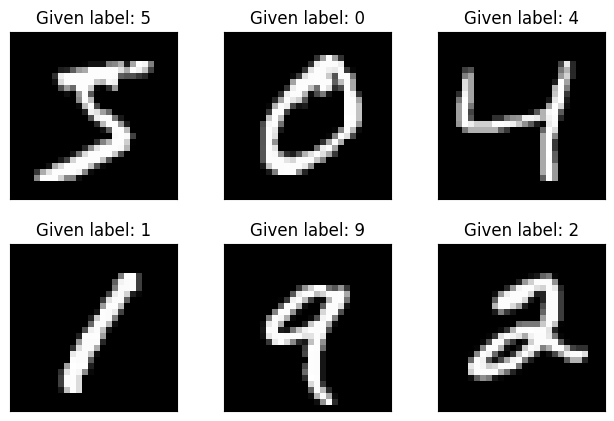

In [59]:
for i,(image,label) in enumerate(train_dataset):
        
    if i < 6:
        print('The label of the image',i,'is',label)
    else:
        break

fig = plt.figure()

for i in range(6):
    image, label = train_dataset[i]  # train_dataset[i] restituisce (immagine trasformata, etichetta originale)
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(image.squeeze(), cmap='gray', interpolation='none')
    plt.title("Given label: {}".format(int(label)))
    plt.xticks([])
    plt.yticks([])

plt.show()

In [60]:
BATCH_SIZE=128

train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle=True, drop_last = True) #drop_last=True: ignores the last batch if it is smaller than other batches
test_loader = DataLoader(test_dataset, batch_size = len(test_dataset), shuffle=False) #do not batch the test set!!!

for i,train_batch in enumerate(train_loader):
    if i==0:
        print('The dimension of the',i,'- th batch is:',train_batch[0].shape,'for X of train and',train_batch[1].shape,'for y of train.','\n') #train_batch[0] is a torch tensor of the X of the train_Set
    if i==len(train_loader)-1:
        print('The dimension of the',i,'- th batch is:',train_batch[0].shape,'for X of train and',train_batch[1].shape,'for y of train.','\n')

for i,test_batch in enumerate(test_loader):
    print('The dimension of the',i,'- th batch is:',test_batch[0].shape,'for X of test and',test_batch[1].shape,'for y of test.','\n')

The dimension of the 0 - th batch is: torch.Size([128, 1, 28, 28]) for X of train and torch.Size([128]) for y of train. 

The dimension of the 467 - th batch is: torch.Size([128, 1, 28, 28]) for X of train and torch.Size([128]) for y of train. 

The dimension of the 0 - th batch is: torch.Size([10000, 1, 28, 28]) for X of test and torch.Size([10000]) for y of test. 



### Architecture

In [61]:
input_dim = image_8.shape[1] * image_8.shape[2] #784, the number of features of each image
output_dim = image_8.shape[1] * image_8.shape[2] #784, should give again the image

class my_net(nn.Module):

    def __init__(self,input_dim, output_dim):
       super(my_net,self).__init__()
       # Encoder layers
       self.encoder = nn.Sequential(
            nn.Flatten(1,3),
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
       #Decoder layers
       self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim),
            nn.Sigmoid(),    # Output pixel values in range [0, 1] for grayscale images
            nn.Unflatten(1, (1, image_8.shape[1], image_8.shape[2]))
        ) 
       
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return decoded
    
model= my_net(input_dim, output_dim).to(device) #we create the model

Another way to write the same architecture is using view:

In [62]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),            # <-- this model only works with 28x28 images
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()                       # Output pixel values in range [0, 1] for grayscale images
        )

    def forward(self, x):

        # Flatten input image (an alternative to torch.flatten())
        x = x.view(x.size(0), -1)

        encoded = self.encoder(x)

        decoded = self.decoder(encoded)

        # Reshape decoded output to image shape (batch_size, 1, 28, 28)
        decoded = decoded.view(-1, 1, 28, 28)

        return decoded

### Adding noise

In [ ]:
def add_noise(inputs, noise_factor=0.4):
    noisy = inputs + noise_factor * torch.randn_like(inputs) #*noise* random of the same dimension of the inputs
                                                            # he mean remains zero but the variance becomes noise_factor*1
    noisy = torch.clamp(noisy, 0., 1.)    #clamps (restringe) all elements 0 < x < 1 
    return noisy

Look at some noising images:

Text(0.1, 0.2, 'Autoencoder')

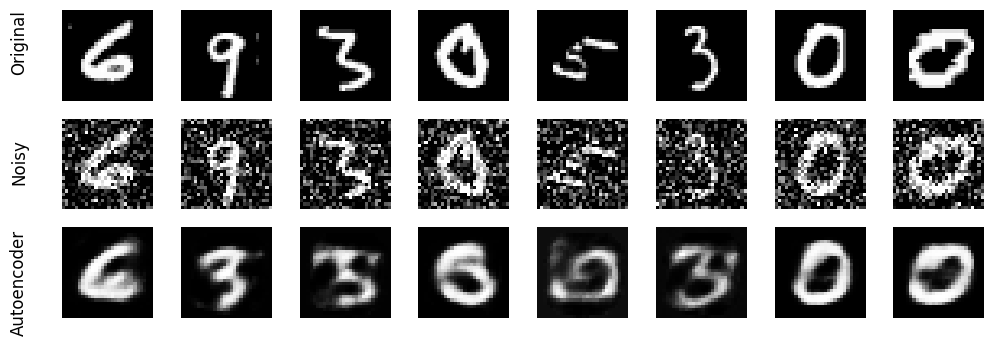

In [130]:
for x_train, y_train in train_loader:
  x_train = x_train[:8].to(device)                 # <-- we select 8 points
  noisy_x = add_noise(x_train)
  recon = model(noisy_x).detach()
  break

fig, axs = plt.subplots(3, 8, figsize=(8 * 1.5, 4))
for i in range(8):
  axs[0, i].imshow(x_train[i][0].cpu(), cmap="gray")
  axs[1, i].imshow(noisy_x[i][0].cpu(), cmap="gray")
  axs[2, i].imshow(recon[i][0].cpu(), cmap="gray")
  for row in axs:
    row[i].axis('off')

fig.text(0.1, 0.8, "Original", va='center', ha='right', fontsize=12, rotation='vertical')
fig.text(0.1, 0.5, "Noisy", va='center', ha='right', fontsize=12, rotation='vertical')
fig.text(0.1, 0.2, "Autoencoder", va='center', ha='right', fontsize=12, rotation='vertical')


### Training and accuracy

We use the **MSEloss()**, but we could have used also BCEloss(). Since we are using autoencoders, we will not use y_train and y_test. Instead, we will **compare x_train and model(x_train)!**. In this case, the accuracy can be represented as the test_losses:

In [ ]:
train_losses = []
test_losses = []

input_dim = image_8.shape[1] * image_8.shape[2] #784, the number of features of each image
output_dim = image_8.shape[1] * image_8.shape[2] #784, should give again the image
EPOCHS = 100 #hyperparameter, we can change it
learning_rate = 0.01 #hyperparameter, we can change it

model = my_net(input_dim, output_dim).to(device) #we create the model
loss_function = nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate,weight_decay=1e-6)

for epoch in range(EPOCHS):
  model.train() # Set the model to training mode
  
  train_loss = 0.0
  for x_train, y_train in train_loader: 
    x_train = x_train.to(device)  # Move input to the device
    y_train = y_train.to(device)  # will not use it!
    noisy_x = add_noise(x_train)  # Add noise to the input
    out = model(noisy_x) 
    loss = loss_function(out, x_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss

  model.eval()
  with torch.no_grad():
    test_loss = 0.0 
    for x_test, y_test in test_loader: 
        x_test = x_test.to(device)  # Move input to the device
        y_test = y_test.to(device)  # Will not use it!
        out_test = model(x_test) 
        loss = loss_function(out_test, x_test)
        test_loss += loss

  train_loss /= len(train_loader)   # We divide by the number of batches
  test_loss /= len(test_loader)     # We divide by the number of batches
  train_losses.append(train_loss.detach().cpu())
  test_losses.append(test_loss.detach().cpu())
  
print('The lowest loss on the train set is',train_losses[-1].item())
print('The lowest loss on the train set is',test_losses[-1].item())


The lowest loss on the train set is 0.021912872791290283
The lowest loss on the train set is 0.022944463416934013


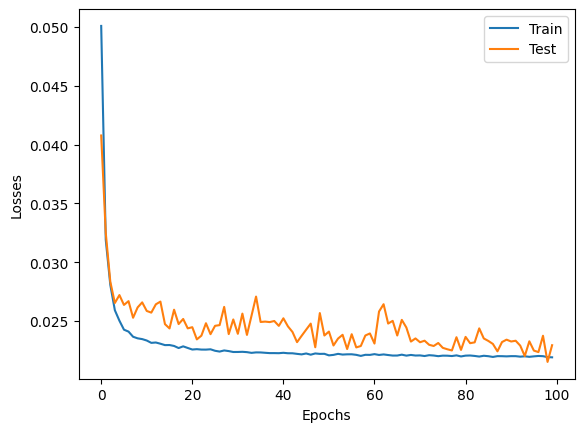

In [137]:
plt.plot(train_losses, label = "Train")
plt.plot(test_losses, label = "Test")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.show()
plt.close()

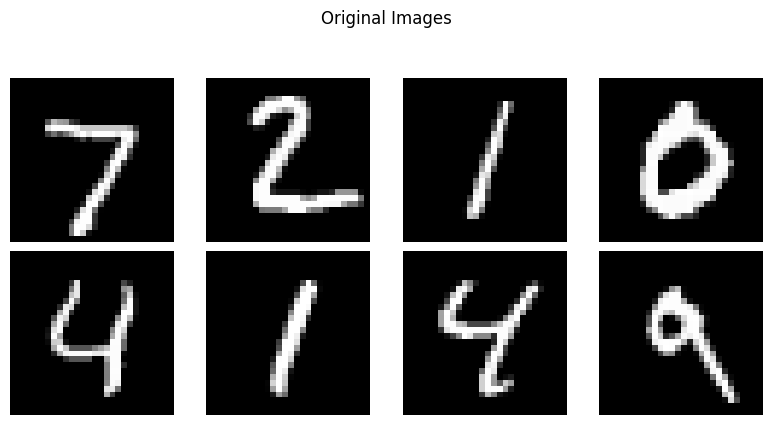

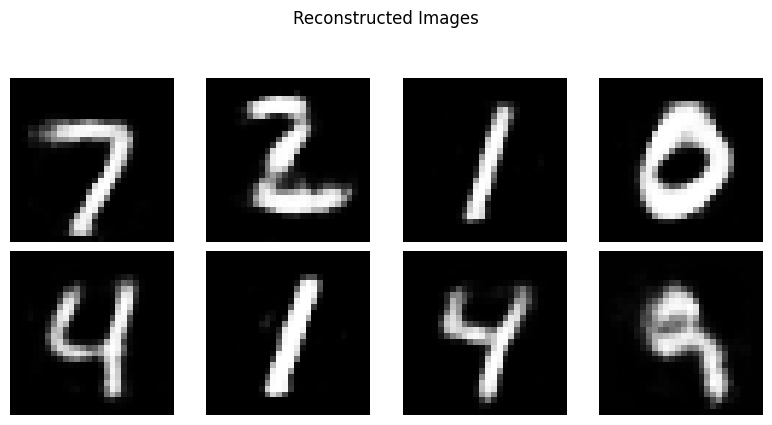

In [138]:
# Plot original and reconstructed images

def plot_images(images, title):
    plt.figure(figsize=(8, 4))
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].squeeze().numpy(), cmap='gray')
        plt.axis('off')
    plt.suptitle(title, y=1.05)
    plt.tight_layout()


plot_images(x_test.cpu(), title="Original Images")
plot_images(out_test.cpu(), title="Reconstructed Images")

### PCA

We want to investigate the latent space, which is the result of the encoder:

In [139]:
latents = []
labels = []

with torch.no_grad():
    for i, (test_images, test_labels) in enumerate(test_loader):
        test_images = test_images.to(device)
        test_labels = test_labels.to(device)
        z = model.encoder(test_images)
        latents.append(z.cpu())
        labels.append(test_labels.cpu())

# latents[0][i] --> is the latent representation of the i-th image in the first batch (which is the full test set in this case); i goes from 0 to dim(test_loader.dataset)-1
# labels[0][i].item() --> is the label of the i-th image in the first batch 

latents, labels = torch.cat(latents), torch.cat(labels)

latents[2] # equal to the previous latents[0][2]

tensor([ 0.0000, 10.8577,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 11.1283,  0.0000,  0.4943,
         0.0000,  0.0000,  0.2762,  0.0000,  0.0000,  0.0000,  5.3255,  0.0000,
         0.0000,  0.0000,  0.0000,  4.0303,  4.3820,  5.5186,  0.0000,  0.0000])

Now that we have the latent space, we can do the PCA on it:

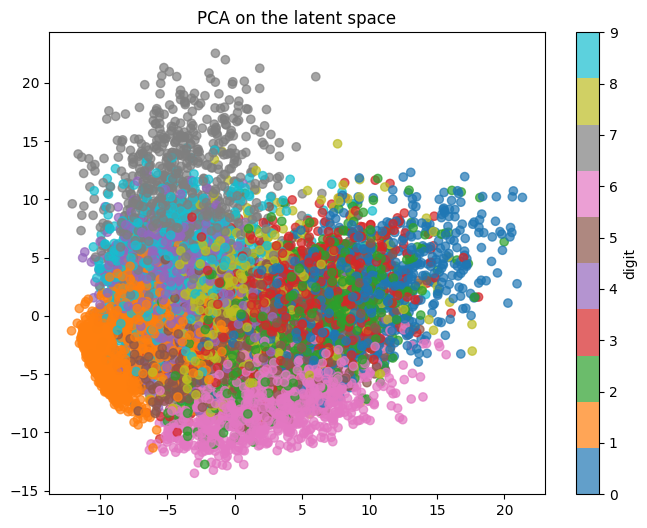

In [140]:
pca = PCA(n_components=2, random_state=42) #2='number of principal components', using sklearn's PCA
latents_2d = pca.fit_transform(latents)

latents_2d.shape # (1000,2)
#latents_2d[i][j] #it is the j-th eigenvalue (j=1,2) of the i-th image in the test set


plt.figure(figsize=(8, 6))
scatter = plt.scatter(latents_2d[:, 0], latents_2d[:, 1], c=labels, cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="digit")
plt.title("PCA on the latent space")
plt.show()

# Reinforcement Learning

## Gridworld with value iteration

In [ ]:
                                ##############################################################

class Gridworld:

  def __init__(self, grid_size, init_cell, rewards, obstacles=[]):
    """
    Training environment for reinforcement learning: gridworld.
    Args:
    - grid_size, (int, int): defining the size of the 2d lattice
    - init_cell, (int, int): coordinates from 0 to size-1 from which the agent starts to play
    - rewards, list((int, int), float): list of the coordinates and values of the rewards
    - obstacles, lits((int, int)): list of the coordinates of the obstacles
    """

    # Define state space
    self.state = None  # current state of the game
    self.state_dim = grid_size
    self.init_state = init_cell
    self.obstacles = obstacles
    # Cells that are not obstacles
    self.states = [(i,j) for i in range(self.state_dim[0]) for j in range(self.state_dim[1]) if (i,j) not in self.obstacles]

    # Define action space
    self.action_dim = (5,)  # up, right, down, left, stay
    self.action_dict = {"up": 0, "right": 1, "down": 2, "left": 3, "stay": 4}
    self.action_coords = [(0, 1), (1, 0), (0, -1), (-1, 0), (0, 0)]  # translations
    self.actions_allowed = self._build_allowed_actions(obstacles)

    # Define rewards table
    self.R = self._build_rewards(rewards)


  def _build_allowed_actions(self, obstacles):
    actions_allowed = dict()
    Nx, Ny = self.state_dim
    for x in range(Nx):
      for y in range(Ny):
        # Actions not allowed at the boundaries
        actions_allowed[(x,y)] = [self.action_dict["stay"]] # The stay action is always allowed
        if (y > 0):
          actions_allowed[(x,y)].append(self.action_dict["down"])
        if (y < Ny - 1):
          actions_allowed[(x,y)].append(self.action_dict["up"])
        if (x > 0):
          actions_allowed[(x,y)].append(self.action_dict["left"])
        if (x < Nx - 1):
          actions_allowed[(x,y)].append(self.action_dict["right"])
        actions_allowed[(x,y)] = np.array(actions_allowed[(x,y)], dtype=int)
        # Actions not allowed because of obstacles
        for o in obstacles:
          if (x+1,y) == o:
            actions_allowed[(x,y)] = actions_allowed[(x,y)][actions_allowed[(x,y)] != self.action_dict["right"]]
          if (x-1,y) == o:
            actions_allowed[(x,y)] = actions_allowed[(x,y)][actions_allowed[(x,y)] != self.action_dict["left"]]
          if (x,y+1) == o:
            actions_allowed[(x,y)] = actions_allowed[(x,y)][actions_allowed[(x,y)] != self.action_dict["up"]]
          if (x,y-1) == o:
            actions_allowed[(x,y)] = actions_allowed[(x,y)][actions_allowed[(x,y)] != self.action_dict["down"]]
    return actions_allowed


  def _build_rewards(self, rewards):
      R = np.zeros(self.state_dim, dtype=float)
      for rew in rewards:
        R[rew[0]] = rew[1]
      return R

  def display(self, ax, values=np.array([]), cmap=cm["Reds"]):
    """
    Plot the map on the axis object ax. It's possible to add a color to each cell, e.g. its value,
    by passing a properly sized vectors of values
    """

    cmap.set_bad("black")
    obstacle_mask = np.zeros(self.state_dim, dtype=bool)
    for obs in obstacles:
      obstacle_mask[obs[0], obs[1]] = True

    if len(values)==0:
      ax = sns.heatmap(obstacle_mask.T, cmap=cm["Greys"], cbar=False,
                       linewidths=0.1, linecolor='#222222')
    else:
      ax = sns.heatmap(values.T, mask=obstacle_mask.T, cmap=cmap,
                       linewidths=0.1, linecolor='#222222', vmin=np.min(values[values != 0]))
      ax.collections[0].colorbar.set_label("Value", fontsize=14)

    ax.invert_yaxis()
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.scatter([start_cell[0]+0.5],[start_cell[1]+0.5], s=100, c='grey', label='Start')
    for rew in rewards:
      ax.scatter([rew[0][0]+0.5],[rew[0][1]+0.5], s=200*rew[1], c='#ffcc00', label='Reward:{}'.format(rew[1]), marker='*')

    return ax


  def display_best_path(self, ax, Q, start_coord, lcolor='black', values=np.array([]), cmap=cm["Reds"]):
    """
    Plot the map and display the best path on the axis object ax.
    """

    ax = self.display(ax, values, cmap)

    s, count, best_action = start_coord, 0, 0
    while best_action != 4 or count < self.state_dim[0]*self.state_dim[1]:
      count += 1
      best_action = np.argmax(Q[s[0], s[1], :])
      new_s = s[0] + self.action_coords[best_action][0], s[1] + self.action_coords[best_action][1]
      ax.plot([s[0]+0.5, new_s[0]+0.5], [s[1]+0.5, new_s[1]+0.5], c='black', lw=3)
      s = new_s

    return ax

                                ##############################################################



class ValIter :

  def __init__(self, gridworld, disc_factor, eps_convergence=1e-4):
    self.gw = gridworld
    self.gamma = disc_factor
    self.eps_conv = eps_convergence
    self.t_max = 1000
    self.values = []


  def run(self):

    self.values_traj = [self._init_vals()]

    self.t = 0
    while self.t < self.t_max and not self._check_convergence():
      self.t += 1
      aux_vals = self._init_vals()
      for s in self.gw.states:
        aux_quals = np.array([])
        for a in self.gw.actions_allowed[s]:
          new_s = (self.gw.action_coords[a][0] + s[0], self.gw.action_coords[a][1] + s[1])
          aux_quals = np.append(aux_quals, self.gw.R[s] + self.gamma * self.values_traj[-1][new_s])
        aux_vals[s] = aux_quals.max()
      self.values_traj.append(aux_vals)

    self.values_traj = np.array(self.values_traj)
    self.values = self.values_traj[-1]


  @property
  def qualities(self):
    if len(self.values) == 0:
      return
    qs = np.zeros((self.gw.state_dim[0], self.gw.state_dim[1], self.gw.action_dim[0]))
    for s in self.gw.states:
      for a in self.gw.actions_allowed[s]:
        new_s = (self.gw.action_coords[a][0] + s[0], self.gw.action_coords[a][1] + s[1])
        qs[s[0], s[1], a] = self.gw.R[s] + self.gamma * self.values[new_s]
        pass
    return qs


  def _init_vals(self):
    return np.zeros(self.gw.state_dim)


  def _check_convergence(self):
    if self.t == 0:
      return False
    return np.max( np.abs( self.values_traj[-1] - self.values_traj[-2]) ) < self.eps_conv

In [ ]:
world_size = (16,12) # dimension of the gridworld

start_cell = (1,1)
obstacles = [(2,2), (2,3), (2,4), (2,5), (2,6), (2,7), (2,8), (2,9),
             (3,9), (4,9), (5,9), (6,8), (6,7), (6,6), (5,5), (4,5),
             (4,4), (5,3), (6,2),
             (9,2), (9,3), (9,4), (9,5), (9,6), (9,7), (9,8), (9,9),
             (10,2), (11,2), (12,2), (13,2)]
rewards = [((4,7), 1), ((13,9), 2)]

gridworld = Gridworld(world_size, start_cell, rewards, obstacles) # Building the world
fig, ax = plt.subplots(figsize=(6, 5))
ax = gridworld.display(ax) # And showing it

val_iter = ValIter(gridworld, disc_factor=0.8)
val_iter.run()

fig, ax = plt.subplots(figsize=(7, 5))
ax = gridworld.display_best_path(ax, val_iter.qualities, start_cell, values=val_iter.values)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.set_xlabel('iteration step')
ax1.set_ylabel('value')

ax1.plot(val_iter.values_traj[:,13,9], label='big reward cell')
ax1.plot(val_iter.values_traj[:,4,7], label='small reward cell')
ax1.plot(val_iter.values_traj[:,1,1], label='initial cell')

ax1.legend()


ax2.set_xlabel('iteration step')
ax2.set_ylabel('delta value')
ax2.set_yscale('log')

for x, y in [(13,9), (4,7), (1,1)]:
  dv = val_iter.values_traj[1:,x,y] - val_iter.values_traj[:-1,x,y]
  ax2.plot(dv)

ax2.plot(np.ones(len(dv)) * val_iter.eps_conv, c='k', ls='--', label='convergence threshold')
ax2.legend()

plt.tight_layout()

## Gridworld with Q-learning

In [ ]:
                                ##################################################
class Gridworld:

  def __init__(self, grid_size, init_cell, rewards, obstacles=[]):
    """
    Training environment for reinforcement learning: gridworld.
    Args:
    - grid_size, (int, int): defining the size of the 2d lattice
    - init_cell, (int, int): coordinates from 0 to size-1 from which the agent starts to play
    - rewards, list((int, int), float): list of the coordinates and values of the rewards
    - obstacles, lits((int, int)): list of the coordinates of the obstacles
    """

    # Define state space
    self.state = None  # current state of the game
    self.state_dim = grid_size
    self.init_state = init_cell
    self.obstacles = obstacles
    # Cells that are not obstacles
    self.states = [(i,j) for i in range(self.state_dim[0]) for j in range(self.state_dim[1]) if (i,j) not in self.obstacles]

    # Define action space
    self.action_dim = (5,)  # up, right, down, left, stay
    self.action_dict = {"up": 0, "right": 1, "down": 2, "left": 3, "stay": 4}
    self.action_coords = [(0, 1), (1, 0), (0, -1), (-1, 0), (0, 0)]  # translations
    self.actions_allowed = self._build_allowed_actions(obstacles)

    # Define rewards table
    self.R = self._build_rewards(rewards)


  def reset(self):
    """Reset agent state to its initial cell"""
    self.state = self.init_state
    return self.state


  def step(self, action):
    """Update agent state"""
    state_next = (self.state[0] + self.action_coords[action][0],
                  self.state[1] + self.action_coords[action][1])
    # Collect reward
    reward = self.R[self.state]
    # Update state
    self.state = state_next
    return state_next, reward


  def _build_allowed_actions(self, obstacles):
    actions_allowed = dict()
    Nx, Ny = self.state_dim
    for x in range(Nx):
      for y in range(Ny):
        # Actions not allowed at the boundaries
        actions_allowed[(x,y)] = [self.action_dict["stay"]] # The stay action is always allowed
        if (y > 0):
          actions_allowed[(x,y)].append(self.action_dict["down"])
        if (y < Ny - 1):
          actions_allowed[(x,y)].append(self.action_dict["up"])
        if (x > 0):
          actions_allowed[(x,y)].append(self.action_dict["left"])
        if (x < Nx - 1):
          actions_allowed[(x,y)].append(self.action_dict["right"])
        actions_allowed[(x,y)] = np.array(actions_allowed[(x,y)], dtype=int)
        # Actions not allowed because of obstacles
        for o in obstacles:
          if (x+1,y) == o:
            actions_allowed[(x,y)] = actions_allowed[(x,y)][actions_allowed[(x,y)] != self.action_dict["right"]]
          if (x-1,y) == o:
            actions_allowed[(x,y)] = actions_allowed[(x,y)][actions_allowed[(x,y)] != self.action_dict["left"]]
          if (x,y+1) == o:
            actions_allowed[(x,y)] = actions_allowed[(x,y)][actions_allowed[(x,y)] != self.action_dict["up"]]
          if (x,y-1) == o:
            actions_allowed[(x,y)] = actions_allowed[(x,y)][actions_allowed[(x,y)] != self.action_dict["down"]]
    return actions_allowed


  def _build_rewards(self, rewards):
      R = np.zeros(self.state_dim, dtype=float)
      for rew in rewards:
        R[rew[0]] = rew[1]
      return R

  def display(self, ax, values=np.array([]), cmap=cm["Reds"]):
    """
    Plot the map on the axis object ax. It's possible to add a color to each cell, e.g. its value,
    by passing a properly sized vectors of values
    """

    cmap.set_bad("black")
    obstacle_mask = np.zeros(self.state_dim, dtype=bool)
    for obs in obstacles:
      obstacle_mask[obs[0], obs[1]] = True

    if len(values)==0:
      ax = sns.heatmap(obstacle_mask.T, cmap=cm["Greys"], cbar=False,
                       linewidths=0.1, linecolor='#222222')
    else:
      ax = sns.heatmap(values.T, mask=obstacle_mask.T, cmap=cmap,
                       linewidths=0.1, linecolor='#222222', vmin=np.min(values[values != 0]))
      ax.collections[0].colorbar.set_label("Value", fontsize=14)

    ax.invert_yaxis()
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.scatter([start_cell[0]+0.5],[start_cell[1]+0.5], s=100, c='grey', label='Start')
    for rew in rewards:
      ax.scatter([rew[0][0]+0.5],[rew[0][1]+0.5], s=200*rew[1], c='#ffcc00', label='Reward:{}'.format(rew[1]), marker='*')

    return ax


  def display_best_path(self, ax, Q, start_coord, lcolor='black', values=np.array([]), cmap=cm["Reds"]):
    """
    Plot the map and display the best path on the axis object ax.
    """

    ax = self.display(ax, values, cmap)

    s, count, best_action = start_coord, 0, 0
    while best_action != 4 or count < self.state_dim[0]*self.state_dim[1]:
      count += 1
      best_action = np.argmax(Q[s[0], s[1], :])
      new_s = s[0] + self.action_coords[best_action][0], s[1] + self.action_coords[best_action][1]
      ax.plot([s[0]+0.5, new_s[0]+0.5], [s[1]+0.5, new_s[1]+0.5], c='black', lw=3)
      s = new_s

    return ax


                                ##################################################



class QL_agent:

  def __init__(self, env, gamma, learning_rate=0.1, eps_decay=0.995, init_Q=0):

    # Store the environment
    self.env = env

    # Agent learning parameters
    self.epsilon = 1.0  # initial exploration probability
    self.epsilon_decay = eps_decay  # epsilon decay after each episode
    self.alpha = learning_rate
    self.gamma = gamma  # reward discount factor

    # Initialize Quality matrix
    self.Q = np.ones(env.state_dim + env.action_dim, dtype=float)*init_Q


  def get_action(self, state):
    """
    Choose an action using an epsilon greedy policy: random with probability
    epsilon, greedy otherwise.
    """
    actions_allowed = self.env.actions_allowed[state]
    if np.random.rand() < self.epsilon:  # explore
      return np.random.choice(actions_allowed)
    else:  # exploit
      Q_s = self.Q[state[0], state[1], actions_allowed]
      actions_greedy = actions_allowed[np.flatnonzero(Q_s == np.max(Q_s))]
      return np.random.choice(actions_greedy)


  def train(self, transition):
    """
    Q-learning update
    """
    (state, action, state_next, reward) = transition
    sa = state + (action,)
    td_error = reward + gamma * np.max(self.Q[state_next]) - self.Q[sa]
    self.Q[sa] += self.alpha * td_error

  @property
  def values(self):
    vals = np.zeros(self.env.state_dim)
    for i in range(len(self.Q)):
      for j in range(len(self.Q[0])):
        vals[i,j] = np.max(self.Q[i,j])
    return vals

  def display_greedy_policy(self):
    greedy_policy = np.zeros((self.env.state_dim[0], self.env.state_dim[1]), dtype=str)
    for x in range(self.env.state_dim[0]):
        for y in range(self.env.state_dim[1]):
            greedy_policy[x, y] = str(np.argmax(self.Q[x, y, :]))
    for o in obstacles:
      greedy_policy[o[0],o[1]] = 'x'
    print("\nGreedy policy for gamma={}:".format(self.gamma))
    print(greedy_policy.T[::-1])
    for (key, val) in sorted(self.env.action_dict.items(), key=operator.itemgetter(1)):
      print(" action['{}'] = {}".format(key, val))
    print("x: obstacle")

In [ ]:
world_size = (10,12) # dimension of the gridworld

start_cell = (2,3)
obstacles = [(2,5), (3,5), (4,5), (5,5), (5,4), (5,3), (5,2), (5,1), (5,0),
             (7,4), (7,5), (7,6), (7,7)]
#rewards = [((8,6), 2), ((5, 10), 1)]
rewards = [((5, 10), 1)]

gridworld = Gridworld(world_size, start_cell, rewards, obstacles) # Building the world

fig, ax = plt.subplots(figsize=(world_size[0]/2.5, world_size[1]/2.5))
ax = gridworld.display(ax) # And showing it

plt.tight_layout()
#plt.savefig('Gridwrold.png', dpi=200)

n_episodes = 1000
n_steps_in_episode = 100
eps_decay = 0.995 # Multiplicative decay factor for the exploration rate
gamma = 0.9
learning_rate=0.1

agent = QL_agent(gridworld, gamma, learning_rate, eps_decay)

# Iteration over all the episodes
for episode in range(n_episodes):

  state = gridworld.reset() # Setting the agent in the initial cell

  for _ in range(n_steps_in_episode):
    action = agent.get_action(state)  # get action
    state_next, reward = gridworld.step(action)  # evolve state by action
    agent.train((state, action, state_next, reward)) # train agent
    state = state_next  # transition to next state

  agent.epsilon = max(agent.epsilon * agent.epsilon_decay, 0.02) # Decrease the exploration
  # Show training info
  sys.stdout.write("\rEpisode: " + str(episode+1) + "/" + str(n_episodes) + " epsilon: " + str(agent.epsilon))
  sys.stdout.flush()

fig, ax = plt.subplots(figsize=(world_size[0]/2.5 + 1, world_size[1]/2.5))
gridworld.display_best_path(ax, agent.Q, start_cell, values=agent.values)

## Cartpole with deep Q-learning

In [ ]:
def run_cartpole(env, policy):
  """
  Run one episode of the cart-pole with a given policy and return the
  environment and the cumulated reward
  """
  state, _ = env.reset()
  terminated, truncated = False, False
  ret = 0
  while not (terminated or truncated):
    action = policy(state)
    state, reward, terminated, truncated, _ = env.step(action)
    ret += reward
  return env, ret


def save_and_display_video(name_prefix, policy, display_it=True):
  """
  A video of an episode of the cart-pole environment is saved in the local Colab
  directory.
  The passed policy is a function taking a state as argument (4d array of floats)
  and returns an action (0 or 1).
  """

  env = gymnasium.make('CartPole-v1', render_mode="rgb_array")

  # Setup the wrapper to record the video
  env.metadata['render_fps'] = 30
  env = RecordVideo(env, video_folder='./videos', name_prefix=name_prefix)

  env, ret = run_cartpole(env, policy)
  print('Episode lasted for', ret, 'steps')
  env.close()


  if display_it:
    video = io.open(glob.glob('videos/'+name_prefix+'-episode-0.mp4')[0], 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''
      <video width="640" height="480" controls>
      <source src="data:video/mp4;base64,{0}" type="video/mp4" />
      </video>
      '''.format(encoded.decode('ascii'))))


# Creating the environment
env = gymnasium.make('CartPole-v1', render_mode="rgb_array")

# Initializing
state, _ = env.reset()
print('initial state:', state)

# Applying a force to the left, action=0
state, reward, terminated, truncated, _ = env.step(0)
print('new state:', state)
print('reward:', reward)
print('terminated, truncated:', terminated, truncated)

env.close()


def rand_policy(state):
  return np.random.choice([0,1])

env = gymnasium.make('CartPole-v1', render_mode="rgb_array")
env, ret = run_cartpole(env, rand_policy)
print('With a random policy the pole was balanced for', ret, 'episodes')


def always_left(state):
  return 0

env = gymnasium.make('CartPole-v1', render_mode="rgb_array")
env, ret = run_cartpole(env, always_left)
print('By pushing always left the pole was balanced for', ret, 'episodes')

#save_and_display_video('rand', rand_policy, display_it=True)

def my_policy(state):
  """
  If the pole is bending towards the left-right I push left-right
  """
  if state[2] < 0:
    return 0
  else:
    return 1

#save_and_display_video('my_policy', my_policy, display_it=True)

In [ ]:
class FullyConnectedModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(FullyConnectedModel, self).__init__()

        # Define layers with ReLU activation
        self.linear1 = nn.Linear(input_size, 16)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(16, 16)
        self.activation2 = nn.ReLU()
        self.linear3 = nn.Linear(16, 16)
        self.activation3 = nn.ReLU()

        # Output layer without activation function
        self.output_layer = nn.Linear(16, output_size)

        # Initialization using Xavier uniform (a popular technique for initializing weights in NNs)
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)
        nn.init.xavier_uniform_(self.linear3.weight)
        nn.init.xavier_uniform_(self.output_layer.weight)

    def forward(self, inputs):
        # Forward pass through the layers
        x = self.activation1(self.linear1(inputs))
        x = self.activation2(self.linear2(x))
        x = self.activation3(self.linear3(x))
        x = self.output_layer(x)
        return x


class QNetwork:
    def __init__(self, lr, logdir=None):
        # Define Q-network with specified architecture
        self.net = FullyConnectedModel(4, 2)
        self.optimizer = optim.Adam(self.net.parameters(), lr=lr(0))

    def update_lr(self, lr):
        for g in self.optimizer.param_groups:
            g['lr'] = lr

Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

class ReplayMemory:
    def __init__(self, memory_size=50000, burn_in=10000):
        # Initializes the replay memory, which stores transitions recorded from the agent taking actions in the environment.
        self.memory_size = memory_size
        self.burn_in = burn_in
        self.memory = deque([], maxlen=memory_size)

    def burn_in_init(self, env):
        # Initialize replay memory with a burn-in number of episodes/transitions.
        terminated, truncated = False, False
        state, _ = env.reset(seed=random.randint(0,100000))
        state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)

        for _ in range(self.burn_in):
            # Reset environment if terminated or truncated
            if terminated or truncated:
                state, _ = env.reset(seed=random.randint(0,100000))
                state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)

            # Randomly select an action (left or right) and take a step
            action = torch.tensor(random.sample([0, 1], 1)[0]).reshape(1, 1)
            next_state, reward, terminated, truncated, _ = env.step(action.item())
            reward = torch.tensor([reward])
            if terminated:
                next_state = None
            else:
                next_state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)

            # Store new experience into memory
            transition = Transition(state, action, next_state, reward)
            self.append(transition)
            state = next_state

    def sample_batch(self, batch_size):
        # Returns a batch of randomly sampled transitions to be used for training the model.
        return random.sample(self.memory, batch_size)

    def append(self, transition):
        # Appends a transition to the replay memory.
        self.memory.append(transition)


class DQN_Agent:

    def __init__(self, environment_name, lr, batch_size=32, gamma=0.99, rand_seed=0):
        # Create environment
        self.env = gymnasium.make(environment_name)
        self.rand_seed = rand_seed
        # Create the quality network
        self.policy_net = QNetwork(lr)
        # Create and initialize the memory
        self.rm = ReplayMemory()
        self.rm.burn_in_init(self.env)
        # Store the parameters
        self.lr = lr # The leraning rate is a function of the episode number
        self.batch_size = batch_size
        self.gamma = gamma


    def train(self, episode):

        # Scheduling the learning rate
        self.policy_net.update_lr(self.lr(episode))

        state, _ = self.env.reset(seed=random.randint(0,100000)) # seeding
        state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        terminated, truncated = False, False

        while not (terminated or truncated):
            with torch.no_grad():
                q_values = self.policy_net.net(state)

            # Decide the next action with epsilon greedy strateg
            action = self.epsilon_greedy_policy(q_values).reshape(1, 1)

            # Take action and observe reward and next state
            next_state, reward, terminated, truncated, _ = self.env.step(action.item())
            reward = torch.tensor([reward])
            if terminated:
                next_state = None
            else:
                next_state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)

            # Store the new experience
            transition = Transition(state, action, next_state, reward)
            self.rm.memory.append(transition)

            # Move to the next state
            state = next_state

            # Sample minibatch with size N from memory
            transitions = self.rm.sample_batch(self.batch_size)
            batch = Transition(*zip(*transitions))
            non_final_mask = torch.tensor(tuple(map(lambda s: s is not None, batch.next_state)), dtype=torch.bool)
            non_final_next_states = torch.cat([s for s in batch.next_state if s is not None])
            state_batch = torch.cat(batch.state)
            action_batch = torch.cat(batch.action)
            reward_batch = torch.cat(batch.reward)

            # Get current and next state values
            state_action_values = self.policy_net.net(state_batch).gather(1, action_batch) # extract values corresponding to the actions Q(S_t, A_t)
            next_state_values = torch.zeros(self.batch_size)

            with torch.no_grad():
                next_state_values[non_final_mask] = self.policy_net.net(non_final_next_states).max(1)[0] # extract max value

            # Update the model
            expected_state_action_values = (next_state_values * self.gamma) + reward_batch
            criterion = torch.nn.MSELoss()
            loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))
            self.policy_net.optimizer.zero_grad()
            loss.backward()
            self.policy_net.optimizer.step()


    def test(self, model_file=None):
        # Evaluates the performance of the agent
        max_t = 200
        state, _ = self.env.reset(seed=random.randint(0,100000))
        rewards = []

        for t in range(max_t):
            state = torch.from_numpy(state).float().unsqueeze(0)
            with torch.no_grad():
                q_values = self.policy_net.net(state)
            # Greedy policy for the evaluation
            action = self.greedy_policy(q_values)
            state, reward, terminated, truncated, _ = self.env.step(action.item())
            rewards.append(reward)
            if terminated or truncated:
                break

        return np.sum(rewards)


    def epsilon_greedy_policy(self, q_values, epsilon=0.05):
        # Implement an epsilon-greedy policy.
        p = random.random()
        if p > epsilon:
            with torch.no_grad():
                return self.greedy_policy(q_values)
        else:
            return torch.tensor([random.randint(0,1)], dtype=torch.long)


    def greedy_policy(self, q_values):
        # Implement a greedy policy for test time.
        return torch.argmax(q_values)


    def get_greedy_action(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0)
        with torch.no_grad():
            q_values = self.policy_net.net(state)
        return int(self.greedy_policy(q_values))

In [ ]:
# seeding for reproducibility
torch.manual_seed(10)
random.seed(10)

# Set environment and training parameters
num_episodes_train = 250
eval_step = 25
num_episodes_eval = 30

# Training in parallel for a given number of trials
num_trials = 5
res = np.zeros((num_trials, num_episodes_train // eval_step + 1))

# Scheduling the learing rate to reduce fluctuations in the final part of the training
def learning_rate(episode):
    if episode < 175:
      return 5e-4
    else:
      return 2e-4


# Loop over multiple trials
for i in range(num_trials):
    print('Trial ', i+1)

    reward_means = []

    # Create an instance of the DQN_Agent class
    agent = DQN_Agent('CartPole-v1', lr=learning_rate)

    # Training loop
    for m in range(num_episodes_train):
        agent.train(m)

        # Evaluate the agent
        if m % eval_step == 0 or m == num_episodes_train-1:
            G = np.zeros(num_episodes_eval)
            for k in range(num_episodes_eval):
                G[k] = agent.test()

            reward_mean = G.mean()
            print(f"The test reward for episode {m+1} is {reward_mean} with a standard deviation of {G.std()}.")
            reward_means.append(reward_mean)

    res[i] = np.array(reward_means)

In [ ]:
for traj in res:
  plt.plot(np.linspace(0, num_episodes_train, len(traj)), traj)
plt.xlabel('Episode', fontsize=15)
plt.ylabel('Avg. Return', fontsize=15)

torch.manual_seed(0)
random.seed(0)
#save_and_display_video('DQN', agent.get_greedy_action, display_it=True)